In [108]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [109]:
#data loading
from google.colab import files
uploaded=files.upload()

Saving book.csv to book (2).csv


In [110]:
book=pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


##Basic & EDA

In [111]:
book.shape

(2000, 11)

In [112]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [113]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [114]:
for i in book.columns:
  print('\n Number of unique oservations in',book[i].name,':',len(book[i].unique()))
  print(' \n Different observations with count in ',book[i].name,':\n',book[i].value_counts())
  print('------------------------------------------------------------------')


 Number of unique oservations in ChildBks : 2
 
 Different observations with count in  ChildBks :
 0    1154
1     846
Name: ChildBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in YouthBks : 2
 
 Different observations with count in  YouthBks :
 0    1505
1     495
Name: YouthBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in CookBks : 2
 
 Different observations with count in  CookBks :
 0    1138
1     862
Name: CookBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in DoItYBks : 2
 
 Different observations with count in  DoItYBks :
 0    1436
1     564
Name: DoItYBks, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in RefBks : 2
 
 Different observations with count in  RefBks :
 0    1571
1     429
Name: RefBks, dtype: in

In [115]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
book_sale_counts=pd.DataFrame(book.sum()).reset_index()
book_sale_counts.rename(columns={'index':'book_name',0:'sales'},inplace=True)
book_sale_counts=book_sale_counts.sort_values('sales',ascending=False).reset_index()
book_sale_counts=book_sale_counts.drop('index',axis=1)
book_sale_counts

,book_name,sales
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


## Visualizing data points

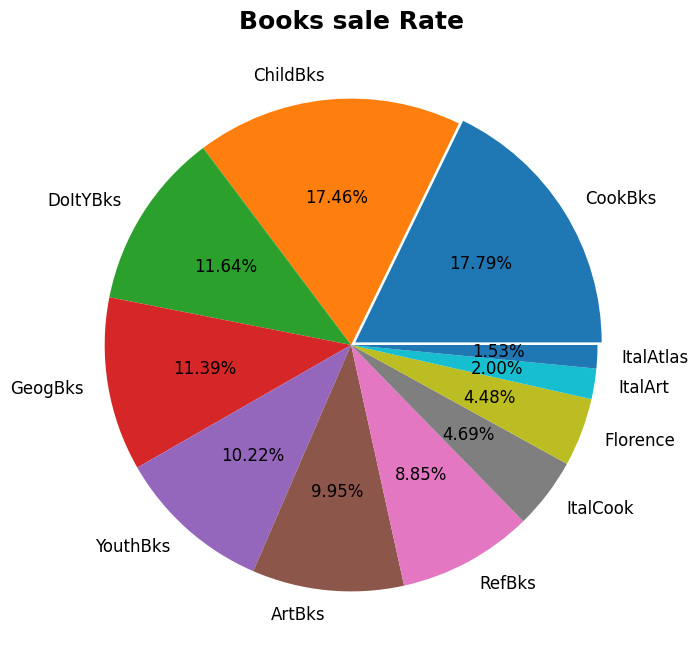

In [117]:
plt.figure(figsize = (8,8))
plt.pie(book_sale_counts['sales'], labels= book_sale_counts['book_name'],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', textprops = {'size': 12})

plt.title("Books sale Rate", fontsize = 18, fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Books sale Frequency')

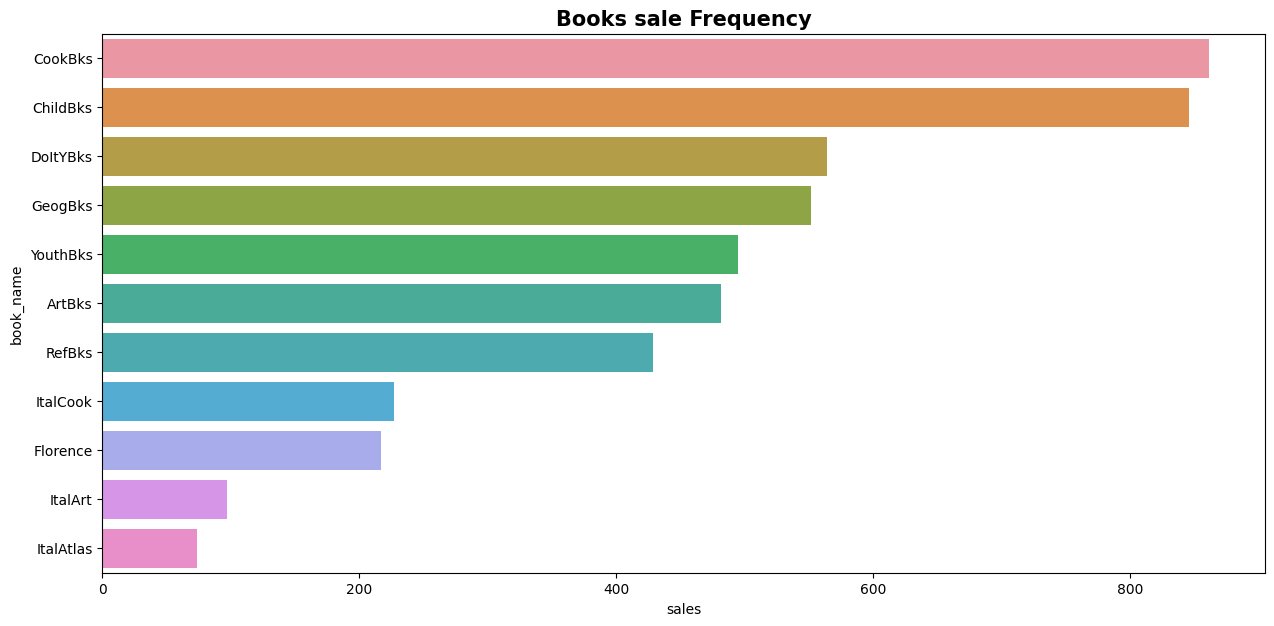

In [118]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = 'sales', y = 'book_name', data= book_sale_counts)
plt.title('Books sale Frequency',  fontsize = 15, fontweight = 'bold')

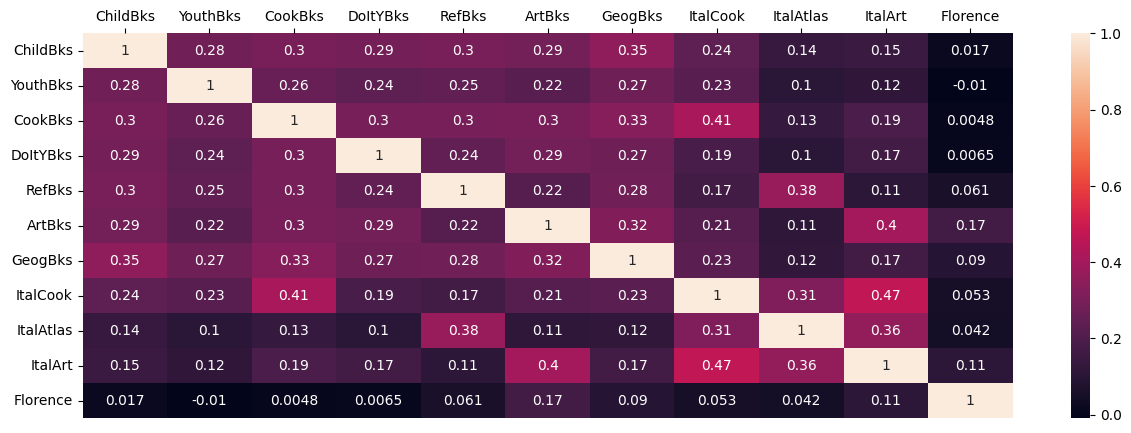

In [119]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,5))
ax = sns.heatmap(book.corr(), annot=True)
ax.xaxis.tick_top()

# Apriori Algorithm 

### trail-1
  support 11%,confidence 30%

In [120]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets1=apriori(book,min_support=0.11,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1650,"(YouthBks, ChildBks)"
9,0.2560,"(CookBks, ChildBks)"


In [121]:
rules1=association_rules(frequent_itemsets1,metric="lift",min_threshold=0.3)
rules1_sorted=rules1.sort_values('lift',ascending=False)
rules1_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
26,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
48,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
53,(RefBks),"(CookBks, ChildBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
63,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [122]:
rules1_sorted.iloc[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
26,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
48,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
53,(RefBks),"(CookBks, ChildBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
63,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
62,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
57,(ArtBks),"(CookBks, ChildBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974
56,"(CookBks, ChildBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
39,(YouthBks),"(CookBks, ChildBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
38,"(CookBks, ChildBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850


Text(0.5, 0, 'lift')

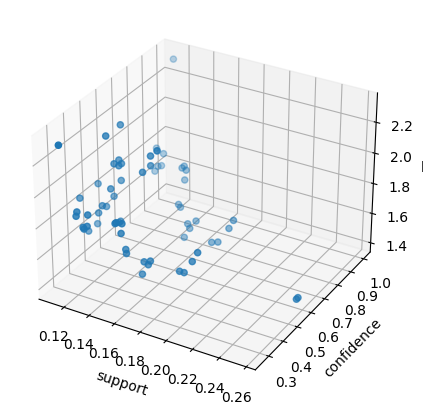

In [123]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules1_sorted['support'],rules1_sorted['confidence'],rules1_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

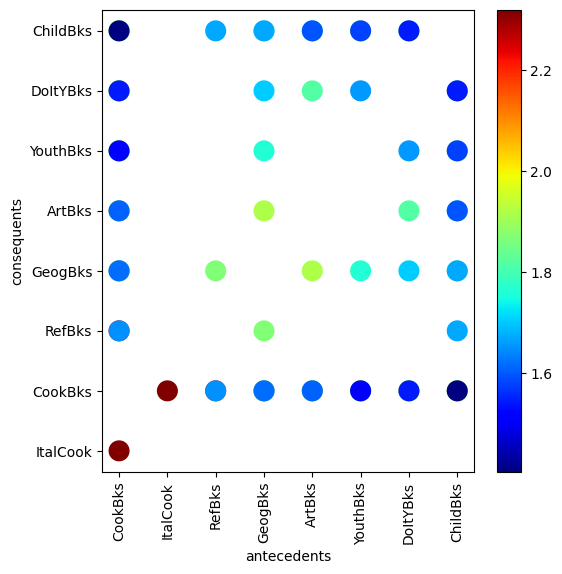

In [124]:
X = rules1_sorted.antecedents
Y = rules1_sorted.consequents
Z = rules1_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

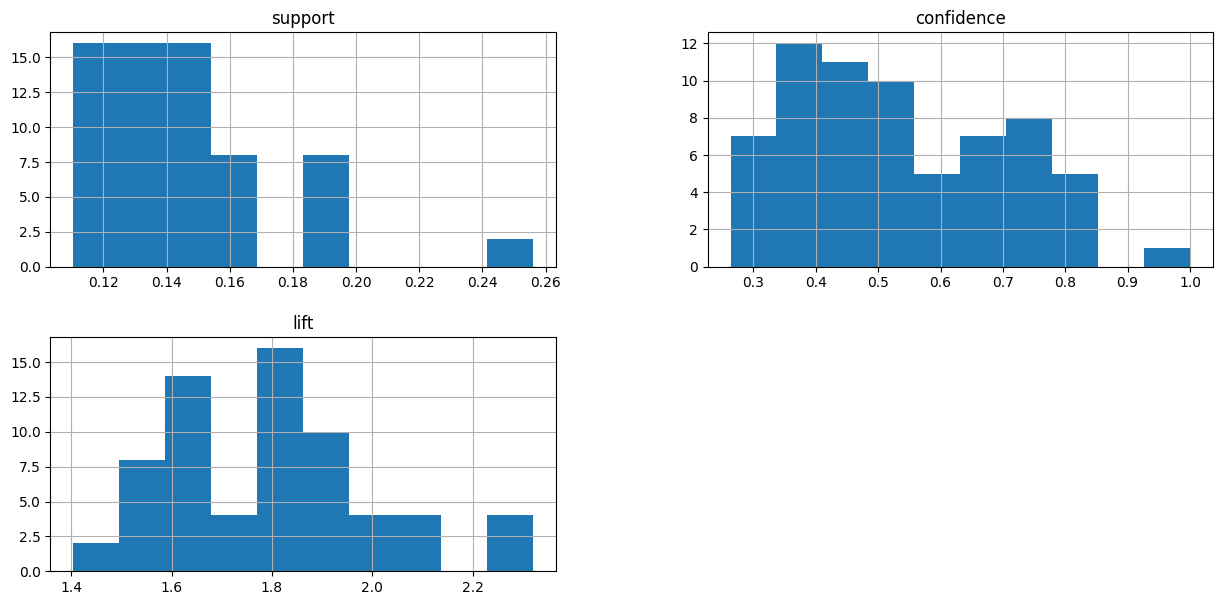

In [125]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

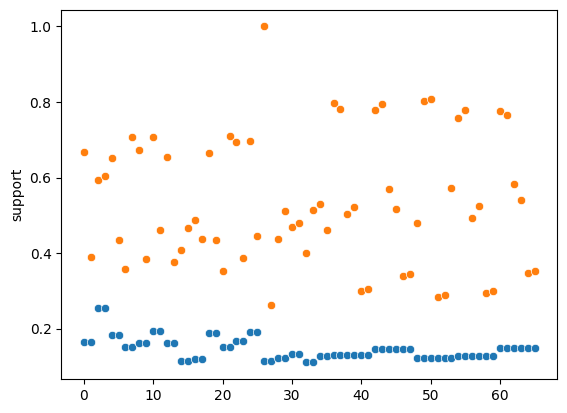

In [126]:
sns.scatterplot(rules1['support'])
sns.scatterplot(rules1['confidence'])
plt.show()

### trail-2
support 13%,confidence 50%

In [127]:
frequent_itemsets2=apriori(book,min_support=0.13,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [128]:
rules2=association_rules(frequent_itemsets2,metric="lift",min_threshold=0.5)
rules2_sorted=rules2.sort_values('lift',ascending=False)
rules2_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
32,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
26,"(CookBks, ChildBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
27,(DoItYBks),"(CookBks, ChildBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
25,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
28,(CookBks),"(DoItYBks, ChildBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
24,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
29,(ChildBks),"(DoItYBks, CookBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
35,(ChildBks),"(GeogBks, CookBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
30,"(GeogBks, CookBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


In [129]:
rules2_sorted.iloc[0:15]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(GeogBks),"(CookBks, ChildBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
32,"(CookBks, ChildBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
26,"(CookBks, ChildBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
27,(DoItYBks),"(CookBks, ChildBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
25,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
28,(CookBks),"(DoItYBks, ChildBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
24,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
29,(ChildBks),"(DoItYBks, CookBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
35,(ChildBks),"(GeogBks, CookBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
30,"(GeogBks, CookBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


Text(0.5, 0, 'lift')

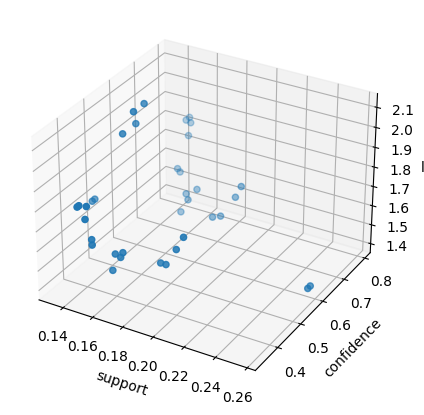

In [130]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules2_sorted['support'],rules2_sorted['confidence'],rules2_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

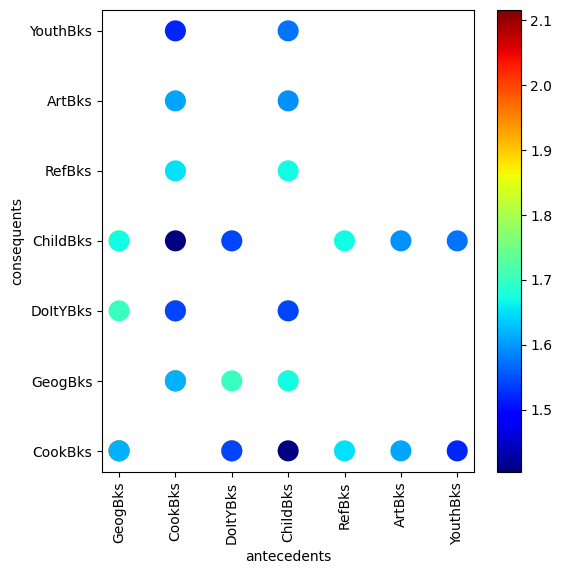

In [131]:
X = rules2_sorted.antecedents
Y = rules2_sorted.consequents
Z = rules2_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

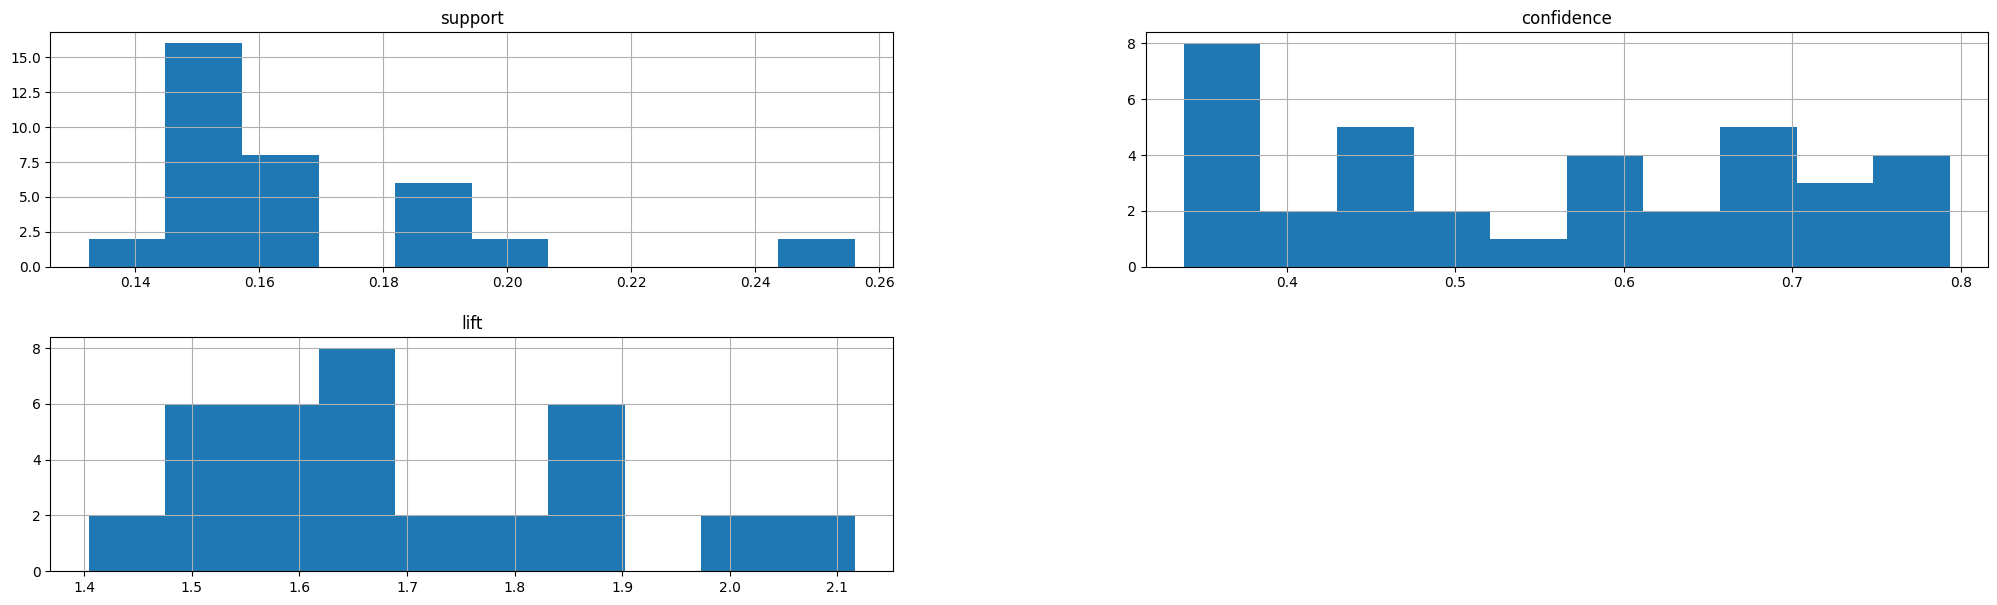

In [132]:
rules2[['support','confidence','lift']].hist(figsize=(25,7))
plt.show()

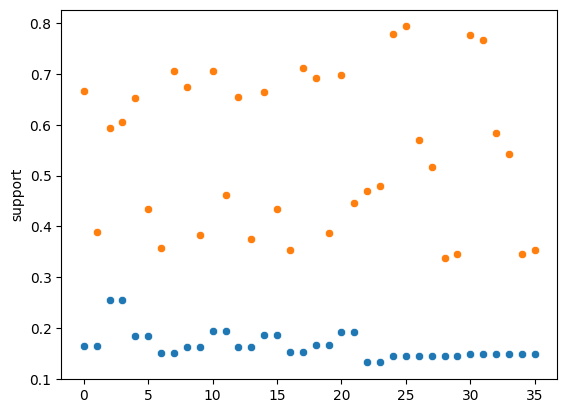

In [133]:
sns.scatterplot(rules2['support'])
sns.scatterplot(rules2['confidence'])
plt.show()

###trail-3
support 15%,confidence 70%

In [134]:
frequent_itemsets3=apriori(book,min_support=0.15,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [135]:
rules3=association_rules(frequent_itemsets3,metric="lift",min_threshold=0.7).reset_index()
rules3_sorted=rules3.sort_values('lift',ascending=False)
rules3_sorted

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
10,10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
21,21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
18,18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
19,19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125


In [136]:
rules3_sorted.iloc[0:20]

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
10,10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
21,21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
18,18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
19,19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125


Text(0.5, 0, 'lift')

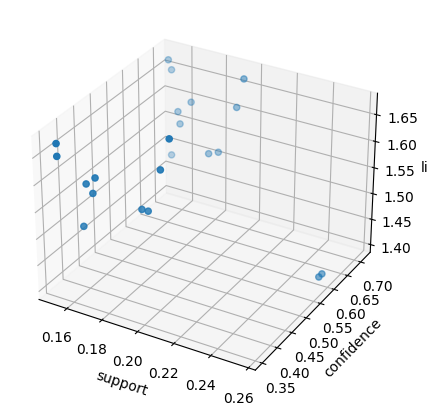

In [137]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules3_sorted['support'],rules3_sorted['confidence'],rules3_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

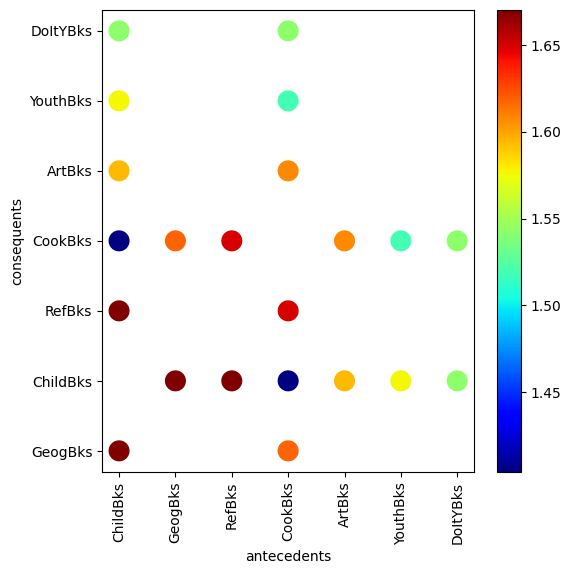

In [138]:
X = rules3_sorted.antecedents
Y = rules3_sorted.consequents
Z = rules3_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

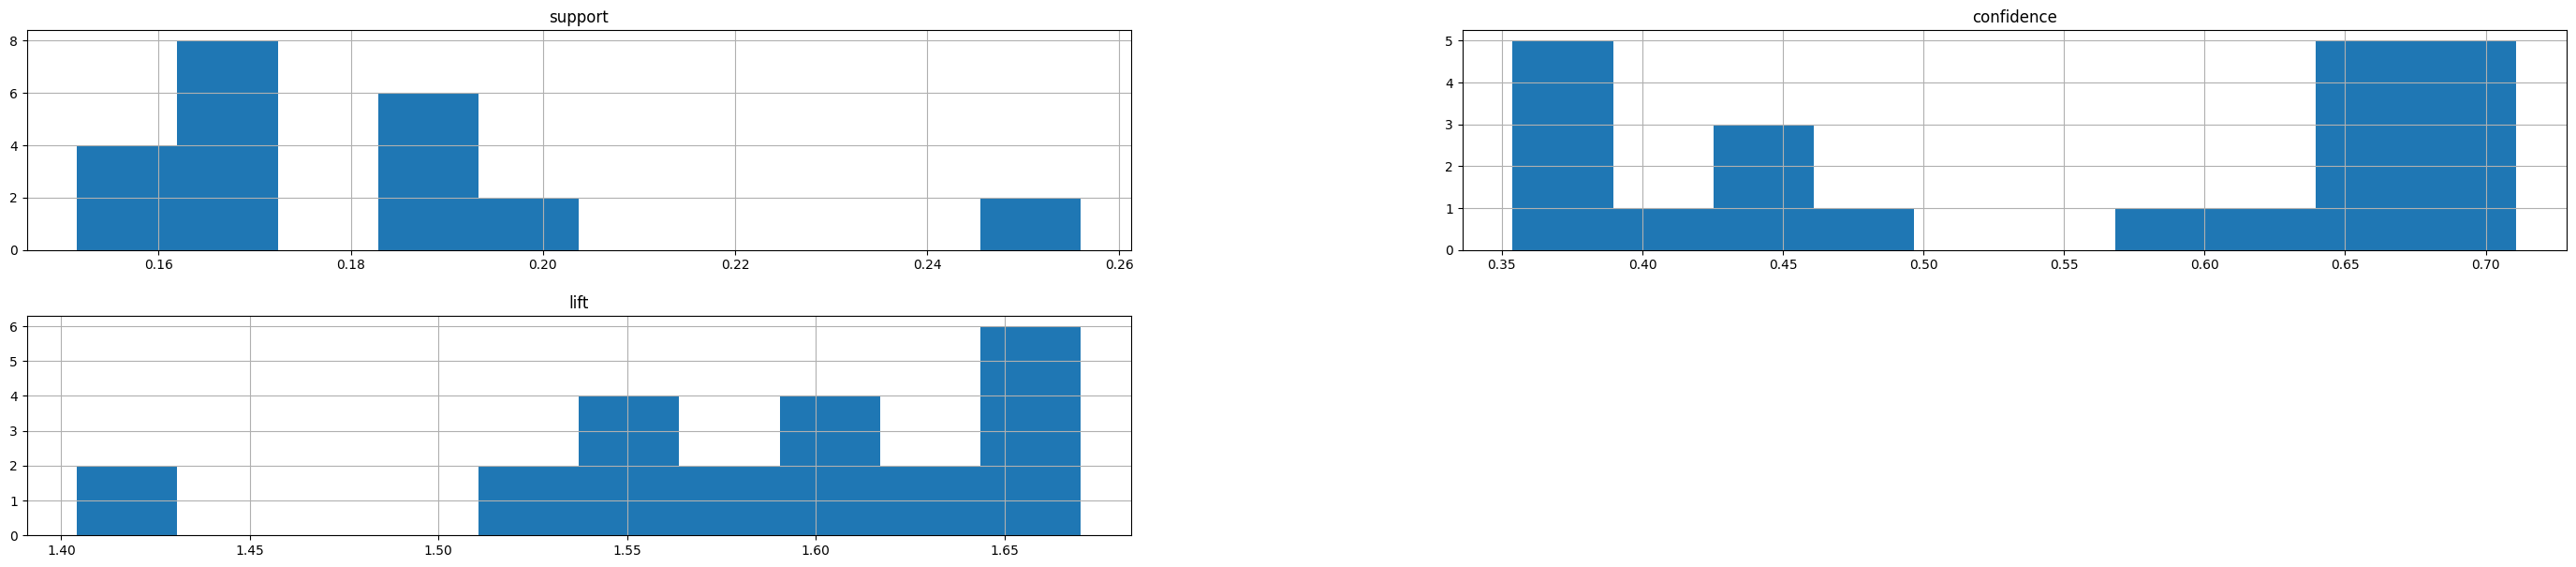

In [139]:
rules3[['support','confidence','lift']].hist(figsize=(35,7))
plt.show()

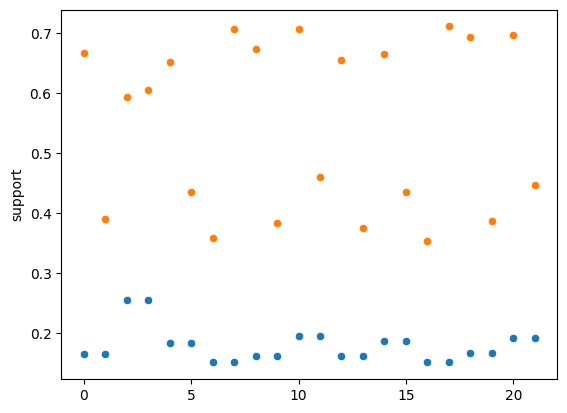

In [140]:
sns.scatterplot(rules3['support'])
sns.scatterplot(rules3['confidence'])
plt.show()

#Conclusion:

In [141]:
def lift_plot(table):
  plt.figure(figsize=(7,7), dpi= 300)
  sns.heatmap(table.pivot('antecedents','consequents','lift'), annot=True)
  plt.title('HeatMap - Antecedents,Consequents and Lift -Matrix',fontsize= 15)
  plt.yticks(rotation=0, fontsize= 5)
  plt.xticks(rotation=40, fontsize= 5)
  plt.show()

 Trail1 support = 11%,confidence=30%


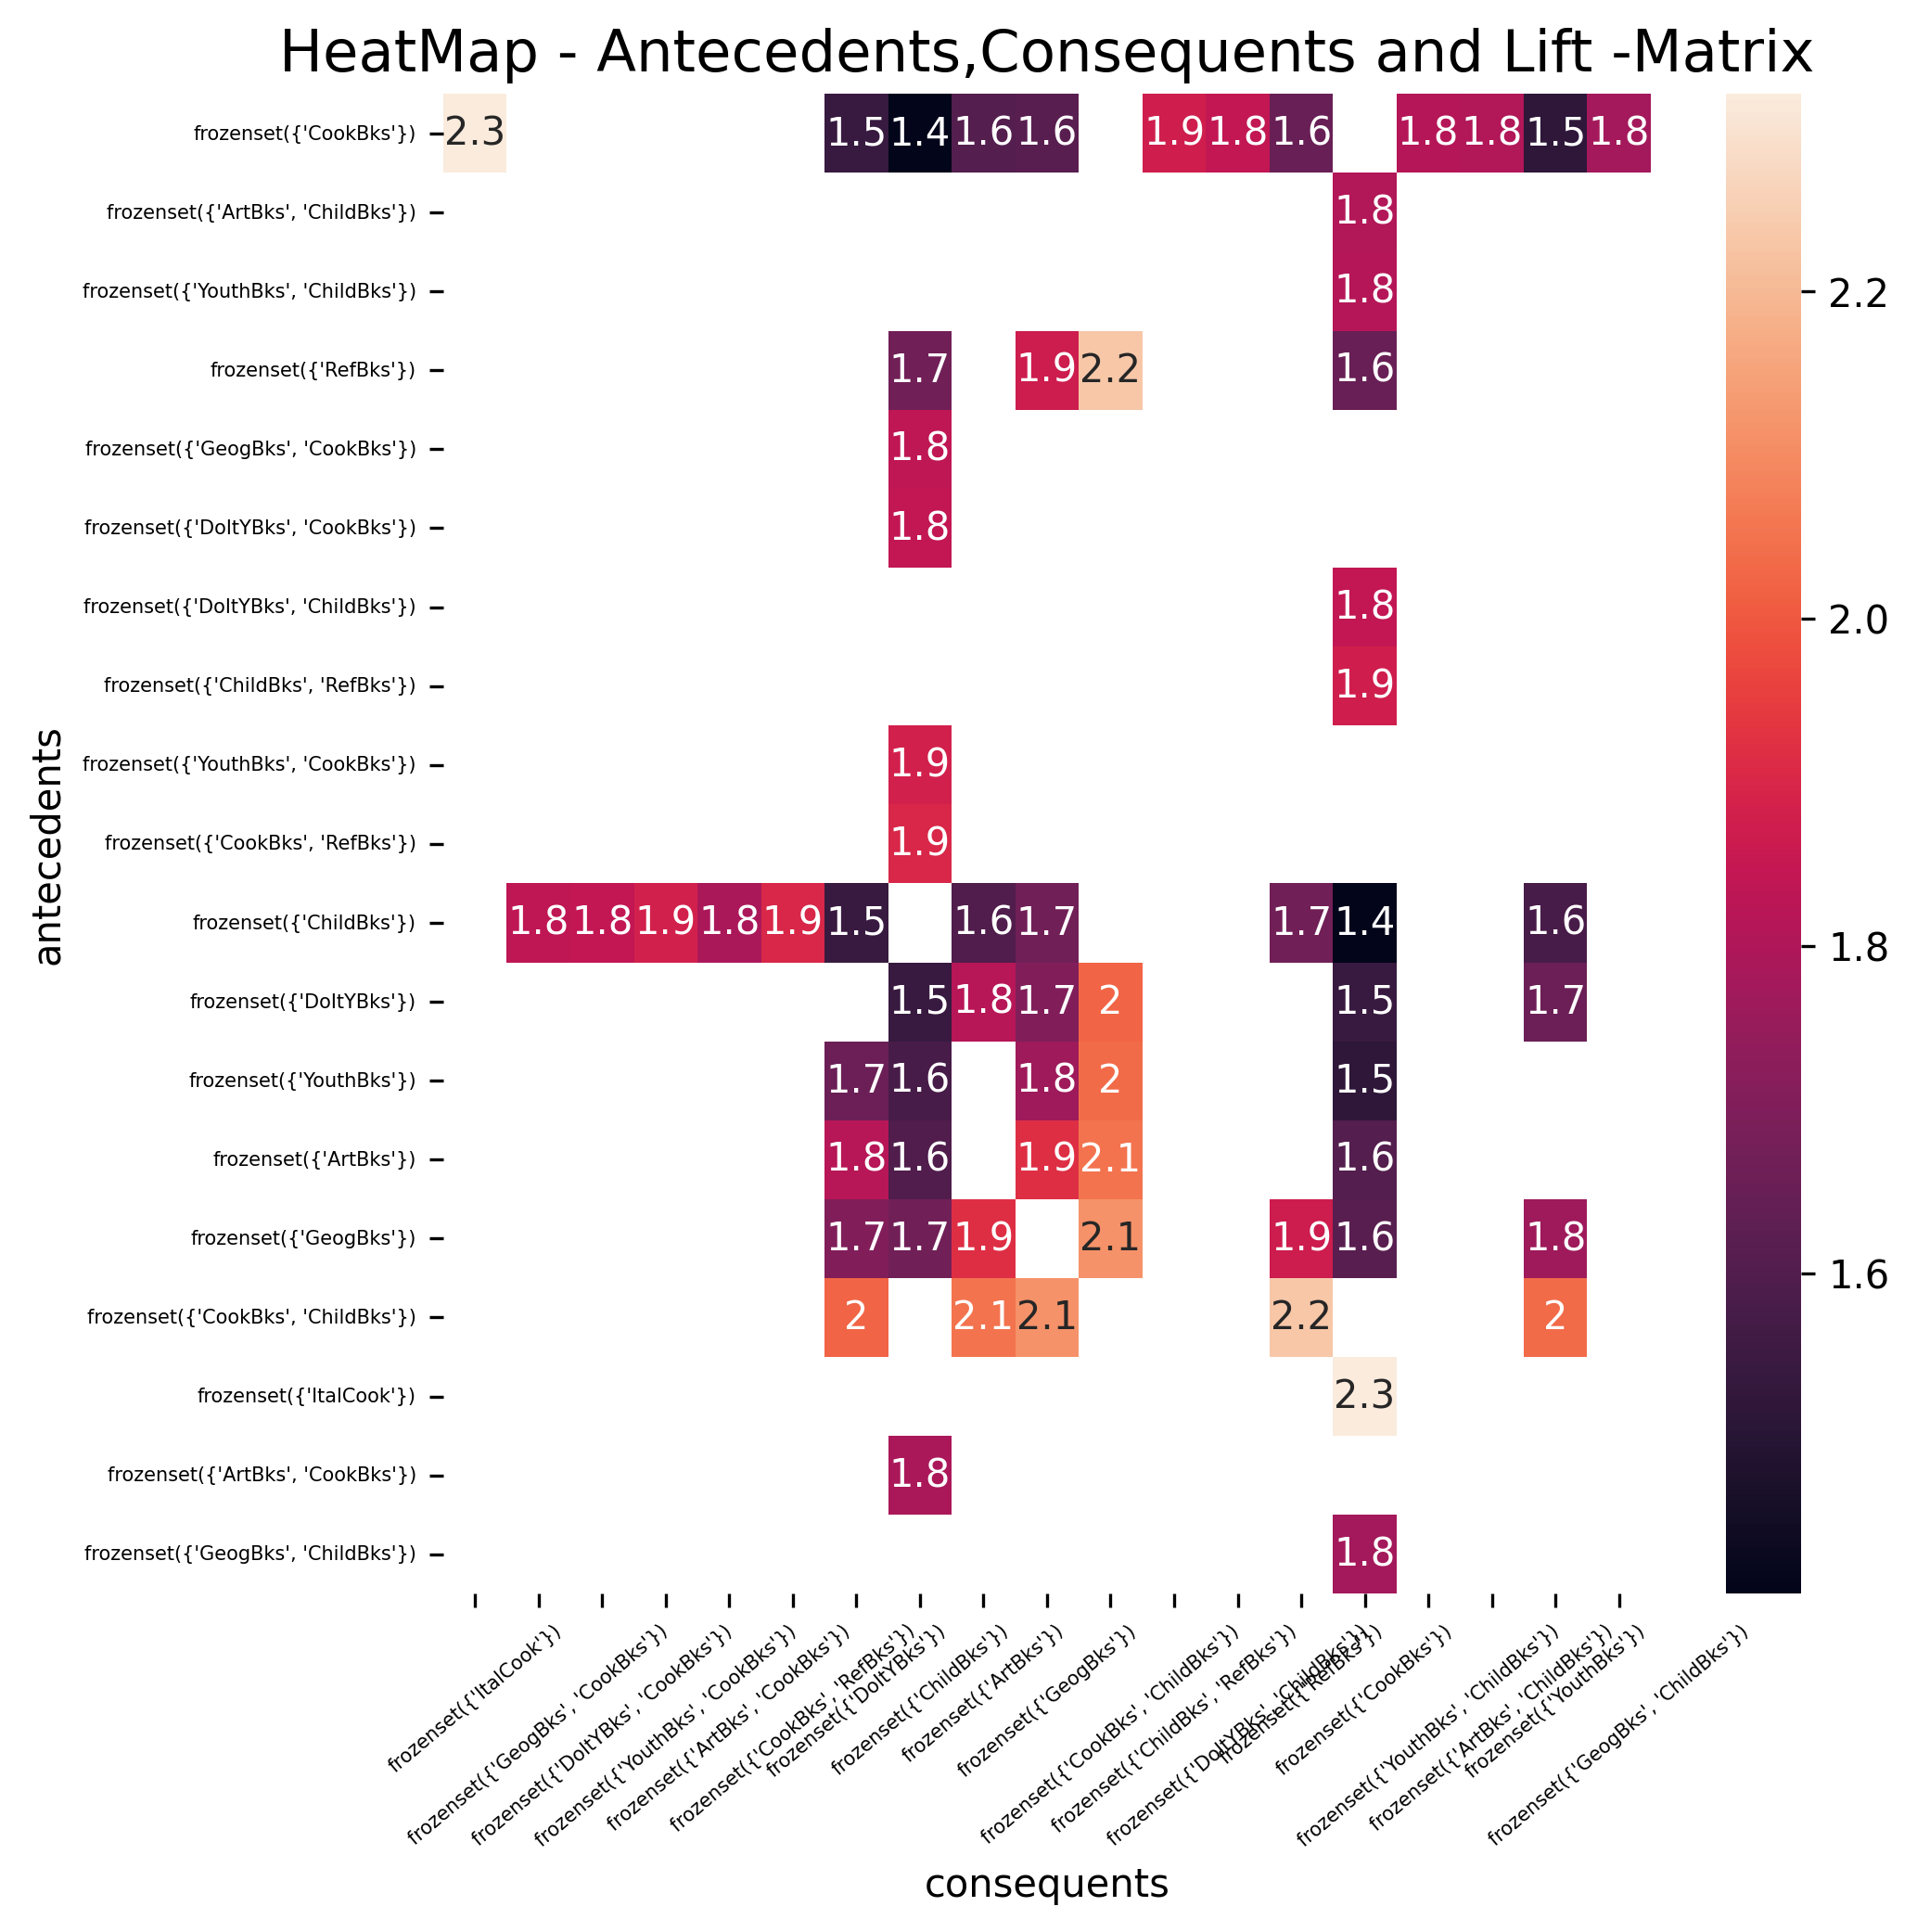


 Trail2 support = 13%,confidence=50%


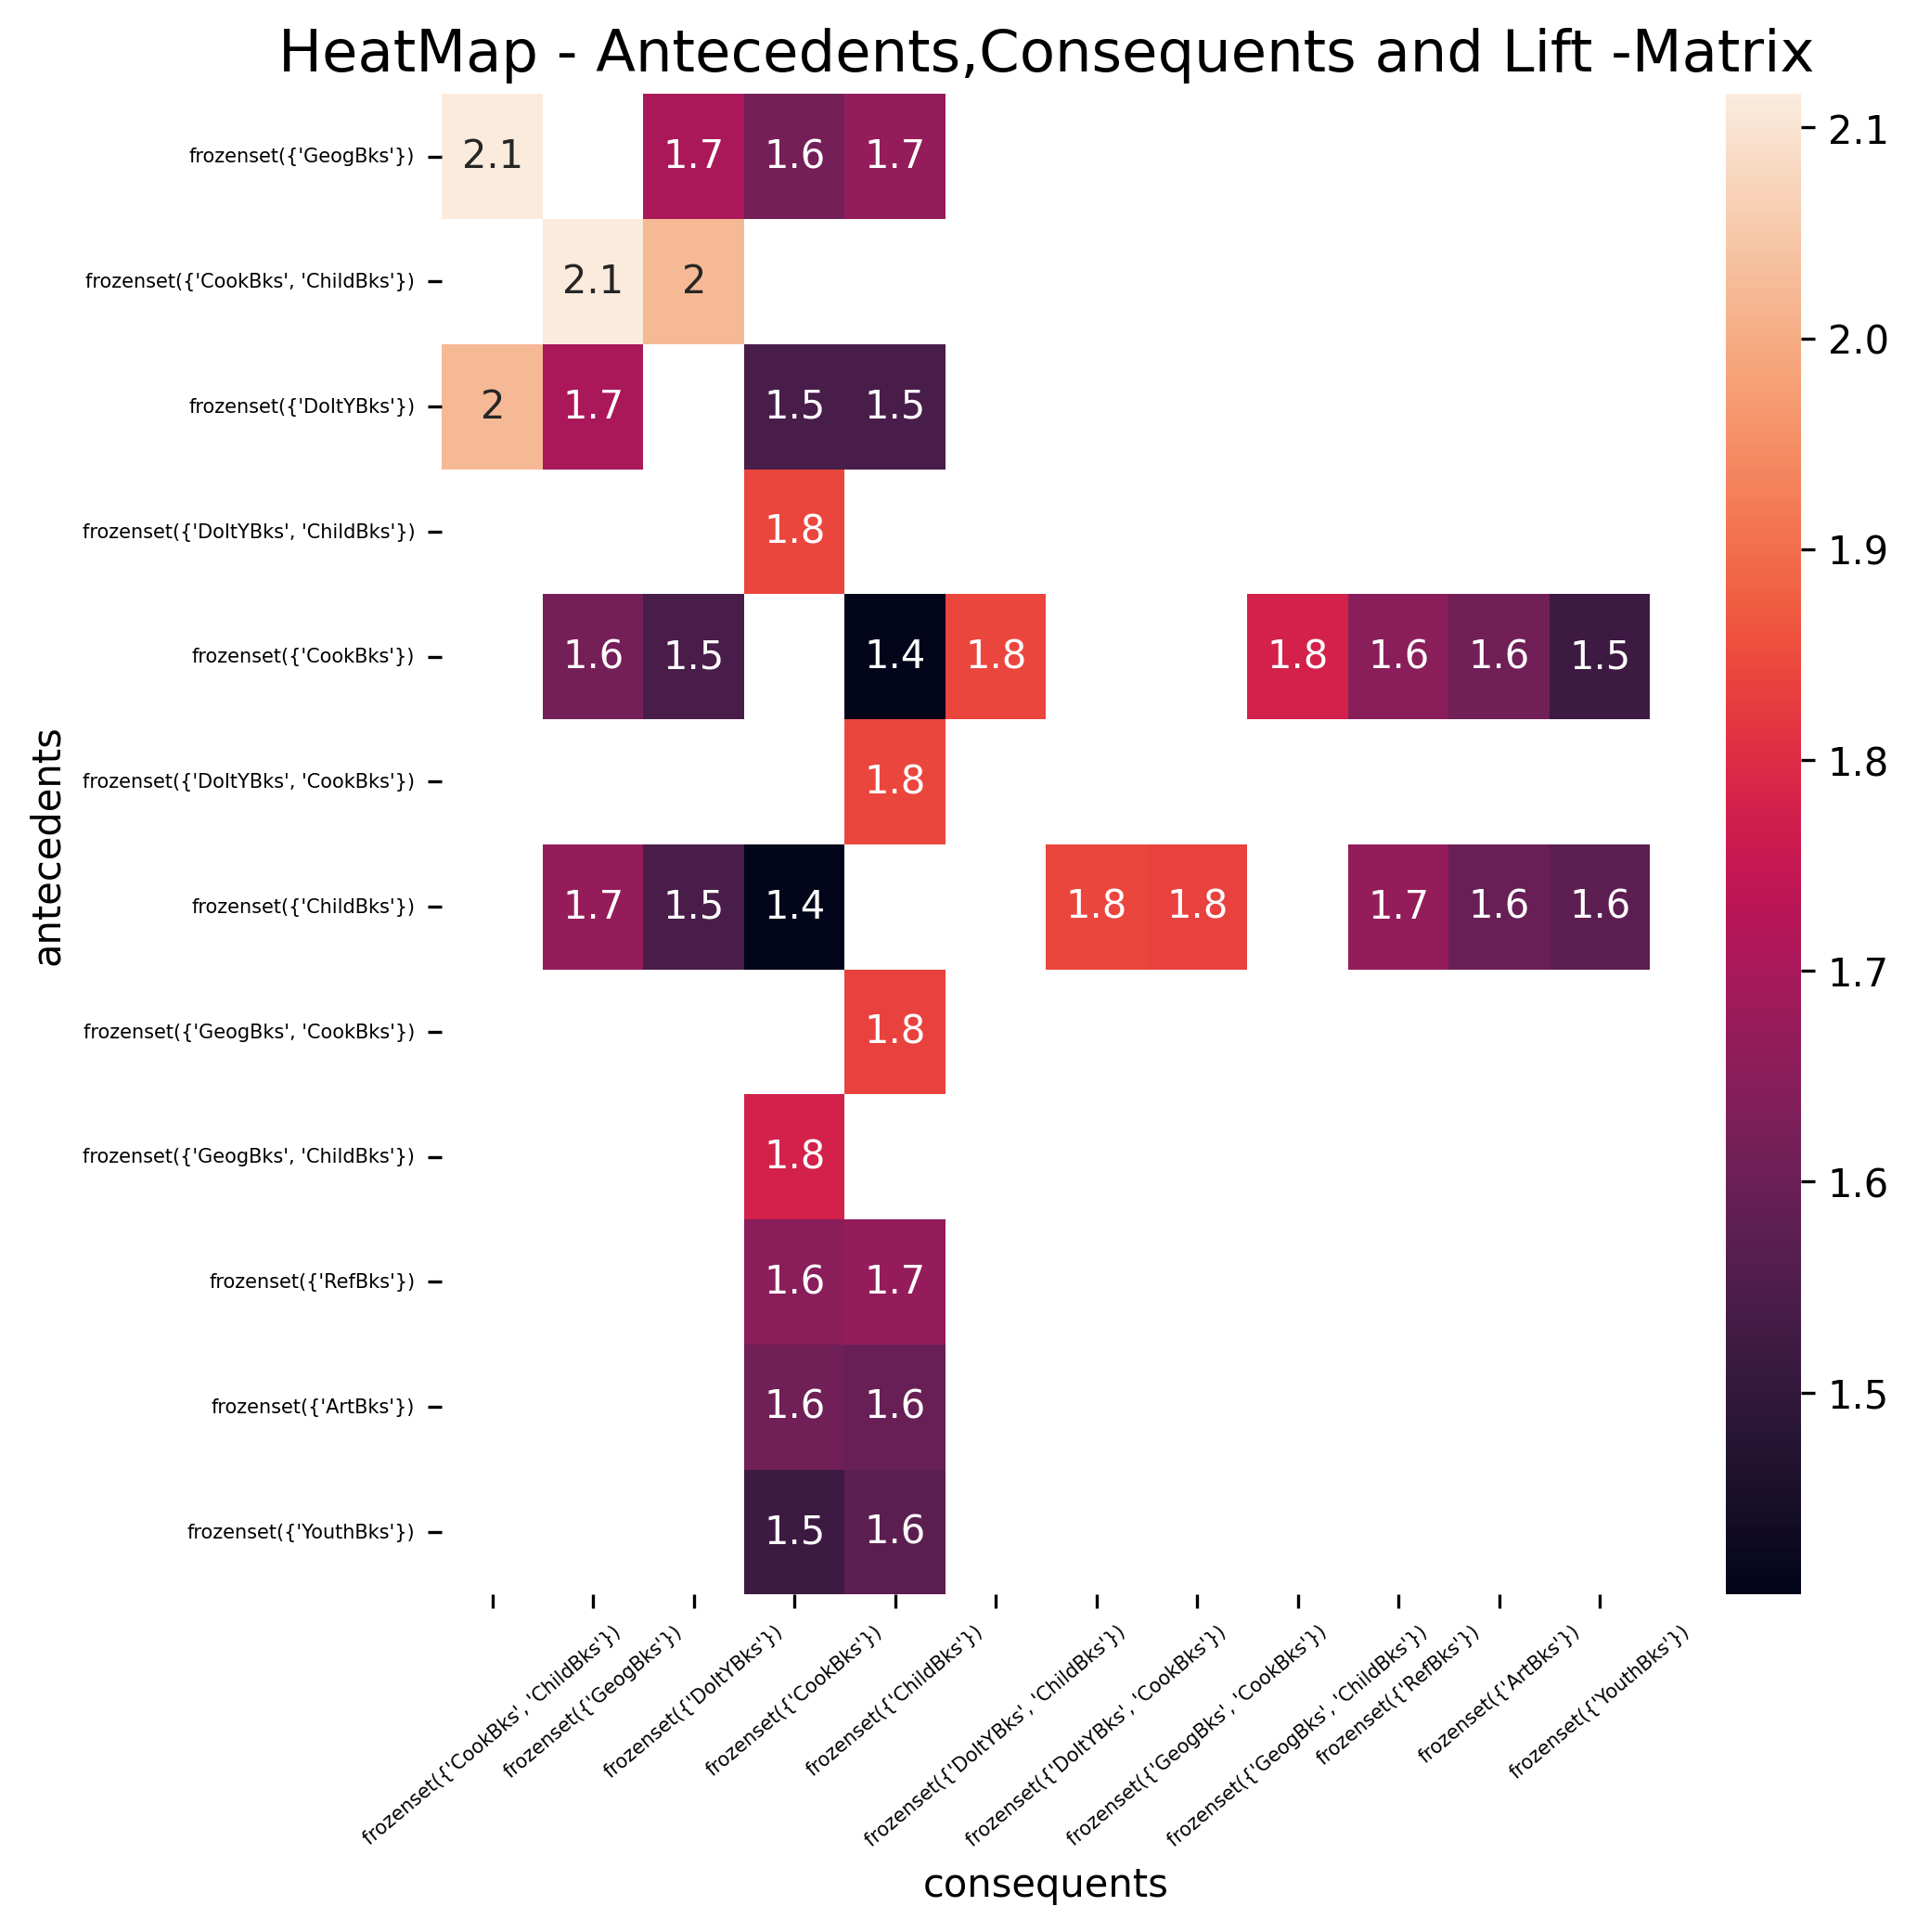


 Trail3 support = 15%,confidence=70%


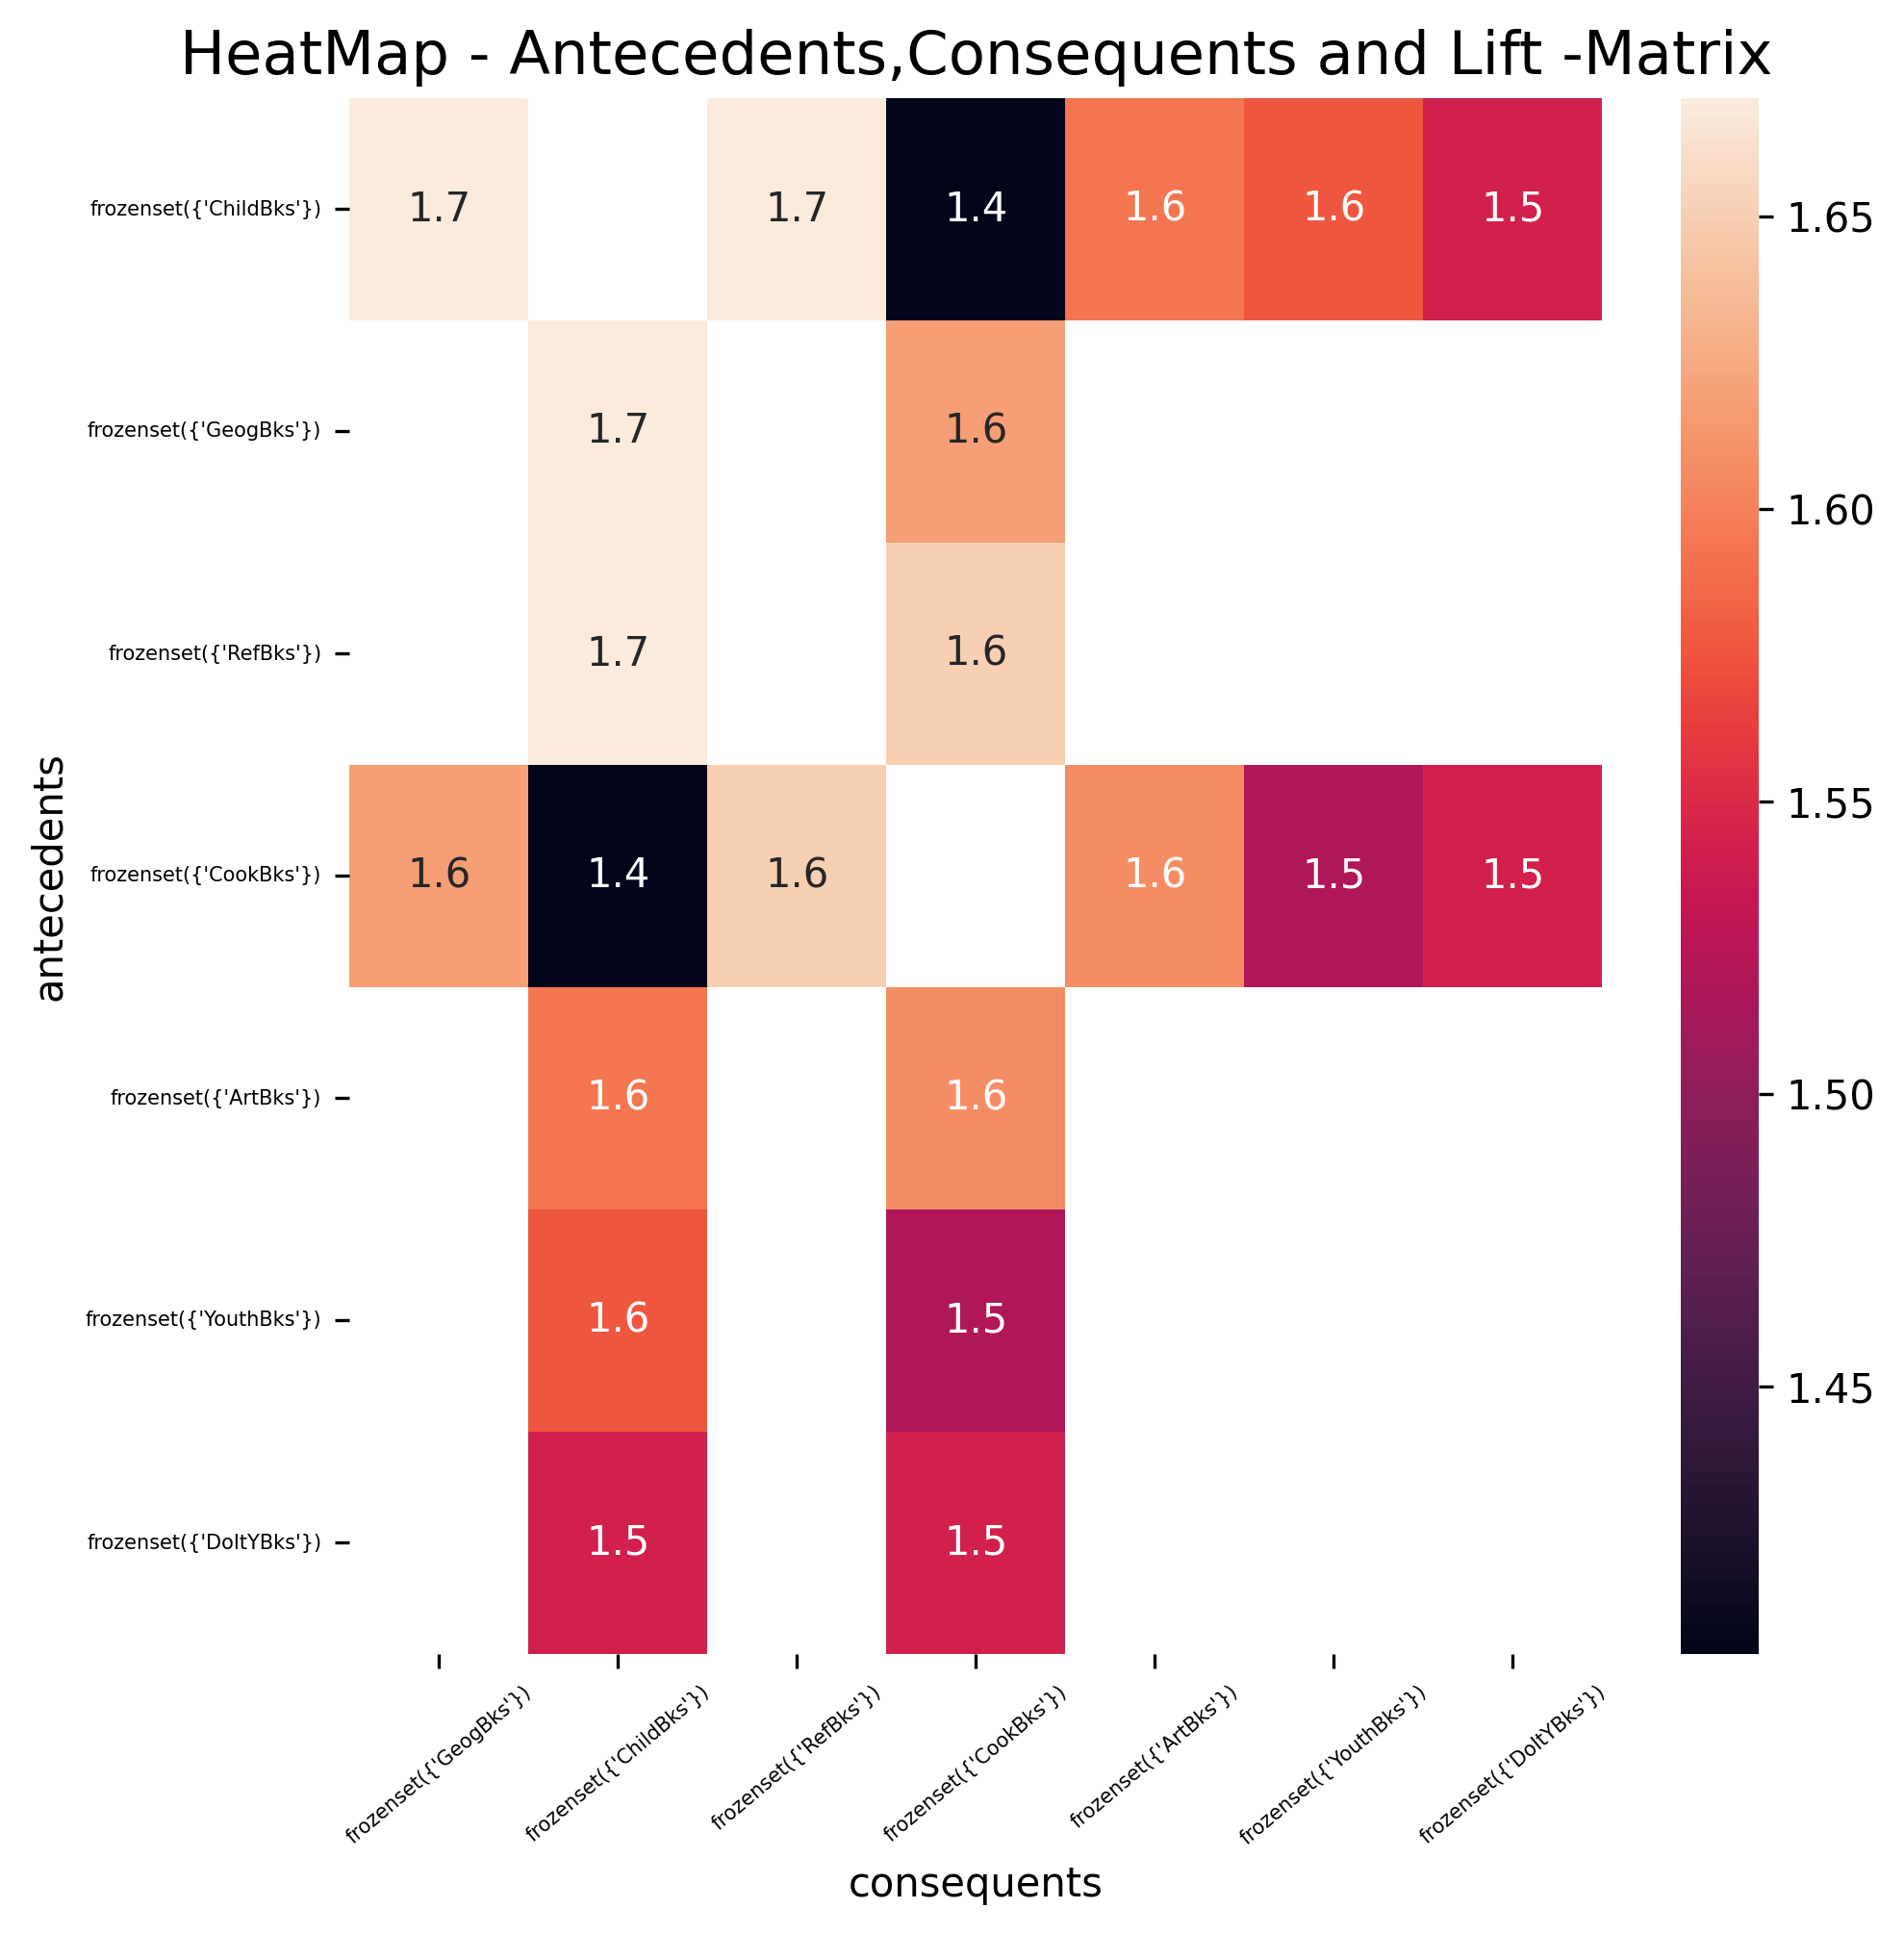

In [142]:
print(' Trail1 support = 11%,confidence=30%')
lift_plot(rules1_sorted)
print('\n Trail2 support = 13%,confidence=50%')
lift_plot(rules2_sorted)
print('\n Trail3 support = 15%,confidence=70%')
lift_plot(rules3_sorted)

*  Trail 1 and Trail 2 are giving a good and acceptable association.
*  Trail 3 is giving diffrent association due to support and confidence variation.



---



#Problem-2)

Prepare rules for the my movies data sets 

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 


#Solution:

In [143]:
#data loading
from google.colab import files
uploaded=files.upload()

Saving my_movies.csv to my_movies (2).csv


In [144]:
my_movies=pd.read_csv('/content/my_movies.csv')
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


##Basic & EDA

In [145]:
movies=my_movies.iloc[:,5:]
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [146]:
movies.shape

(10, 10)

In [147]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [148]:
movies.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [149]:
movies.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool

In [150]:
for i in movies.columns:
  print('\n Number of unique oservations in',movies[i].name,':',len(movies[i].unique()))
  print(' \n Different observations with count in ',movies[i].name,':\n',movies[i].value_counts())
  print('------------------------------------------------------------------')


 Number of unique oservations in Sixth Sense : 2
 
 Different observations with count in  Sixth Sense :
 1    6
0    4
Name: Sixth Sense, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in Gladiator : 2
 
 Different observations with count in  Gladiator :
 1    7
0    3
Name: Gladiator, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in LOTR1 : 2
 
 Different observations with count in  LOTR1 :
 0    8
1    2
Name: LOTR1, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in Harry Potter1 : 2
 
 Different observations with count in  Harry Potter1 :
 0    8
1    2
Name: Harry Potter1, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in Patriot : 2
 
 Different observations with count in  Patriot :
 1    6
0    4
Name: Patriot, dtype: int64
--

In [151]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
movie_counts=pd.DataFrame(movies.sum()).reset_index()
movie_counts.rename(columns={'index':'movie_geners',0:'count'},inplace=True)
movie_counts=movie_counts.sort_values('count',ascending=False).reset_index()
movie_counts=movie_counts.drop('index',axis=1)
movie_counts

,movie_geners,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


## Visualizing data points

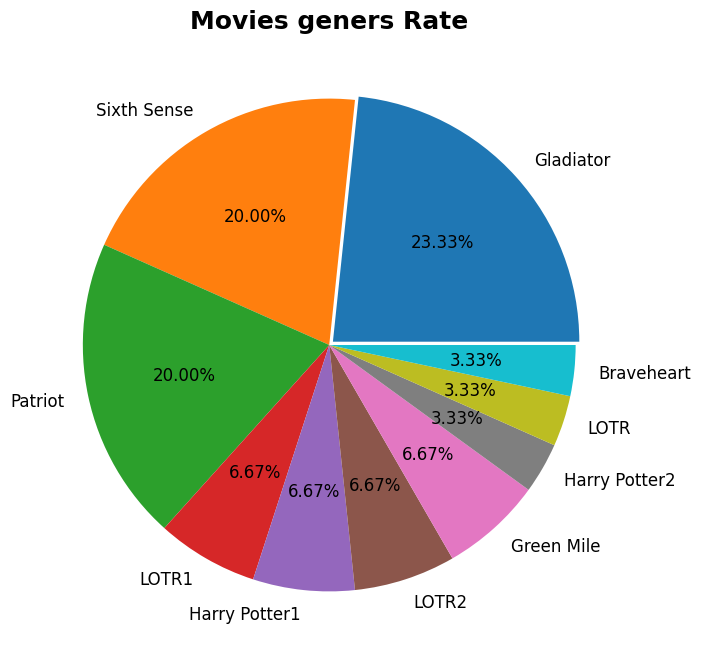

In [153]:
plt.figure(figsize = (8,8))
plt.pie(movie_counts['count'], labels= movie_counts['movie_geners'],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', textprops = {'size': 12})
plt.title("Movies geners Rate", fontsize = 18, fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Movie Geners Frequency')

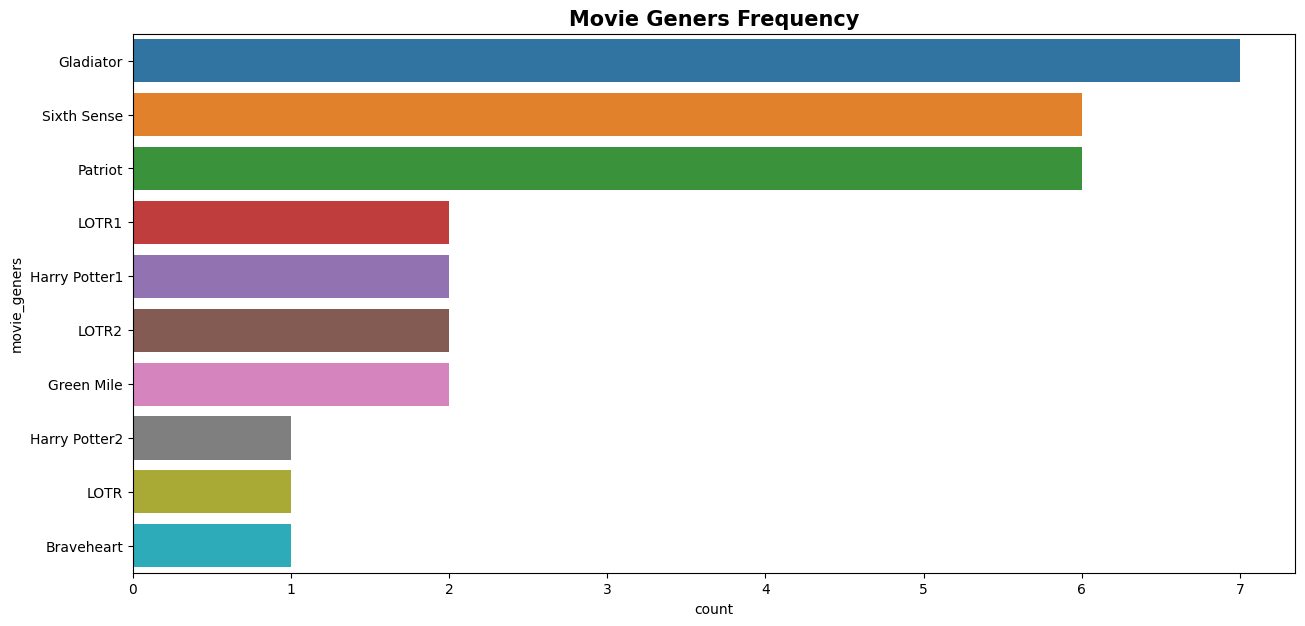

In [154]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = 'count', y = 'movie_geners', data= movie_counts)
plt.title('Movie Geners Frequency',  fontsize = 15, fontweight = 'bold')

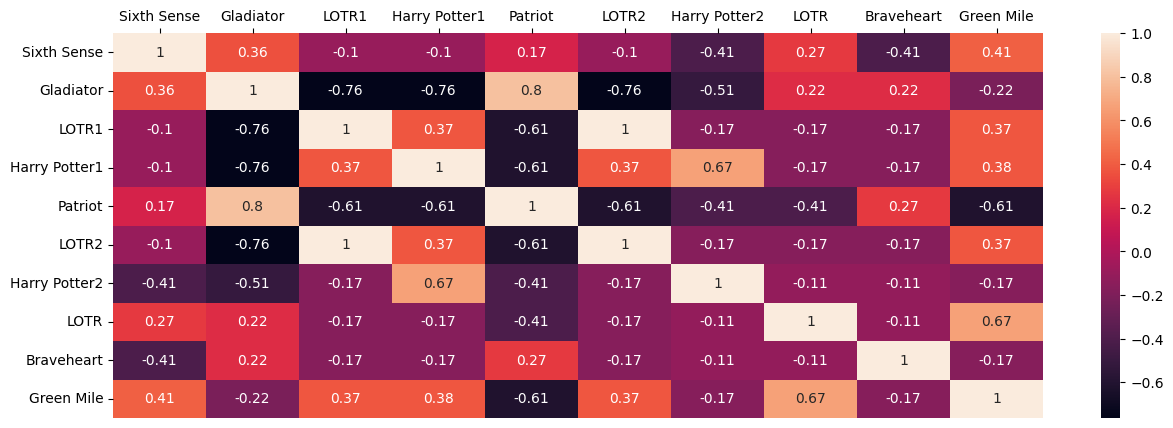

In [155]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,5))
ax = sns.heatmap(movies.corr(), annot=True)
ax.xaxis.tick_top()

## Apriori Algorithm

### trail-1
  support 20%,confidence 40%

In [156]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets1=apriori(movies,min_support=0.20,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [157]:
rules1=association_rules(frequent_itemsets1,metric="lift",min_threshold=0.4)
rules1_sorted=rules1.sort_values('lift',ascending=False)
rules1_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
15,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [158]:
rules1_sorted.iloc[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
15,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


Text(0.5, 0, 'lift')

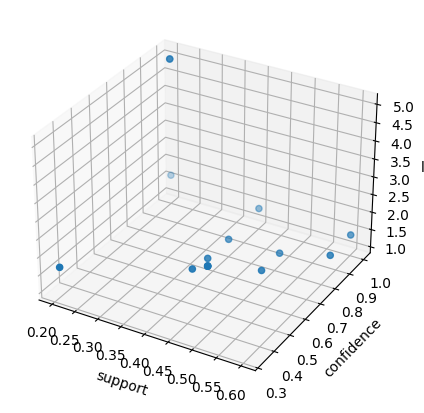

In [159]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules1_sorted['support'],rules1_sorted['confidence'],rules1_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

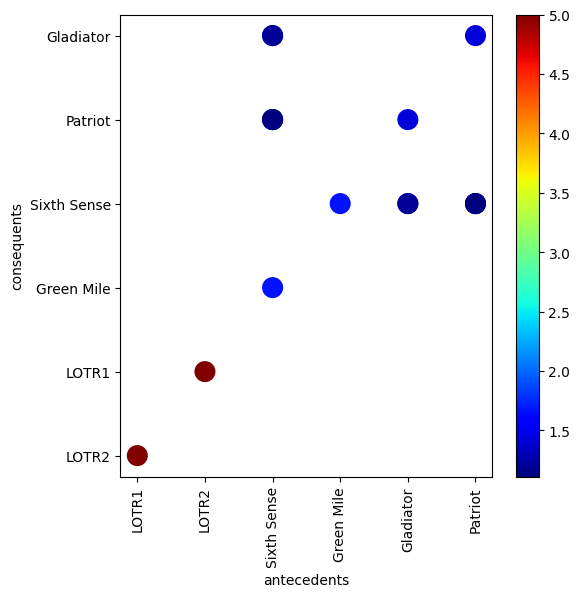

In [160]:
X = rules1_sorted.antecedents
Y = rules1_sorted.consequents
Z = rules1_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

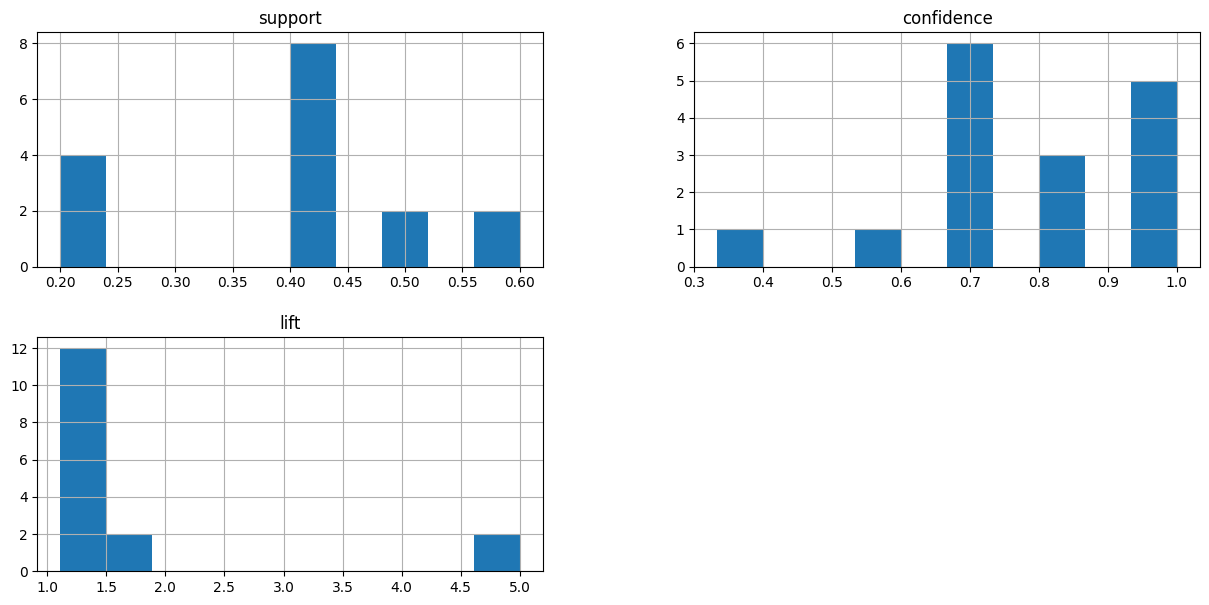

In [161]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

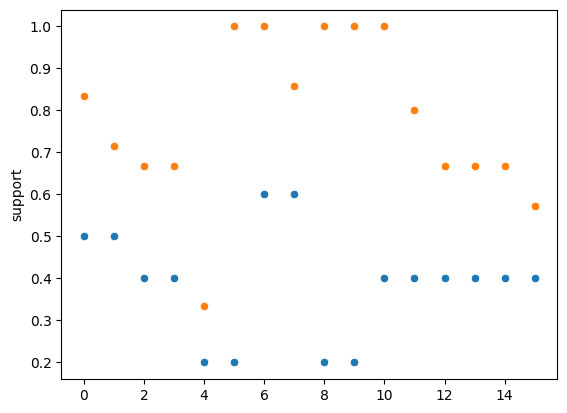

In [162]:
sns.scatterplot(rules1['support'])
sns.scatterplot(rules1['confidence'])
plt.show()

### trail-2
support 30%,confidence 50%

In [163]:
frequent_itemsets2=apriori(movies,min_support=0.30,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Sixth Sense, Patriot, Gladiator)"


In [164]:
rules2=association_rules(frequent_itemsets2,metric="lift",min_threshold=0.5)
rules2_sorted=rules2.sort_values('lift',ascending=False)
rules2_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
11,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
10,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [165]:
rules2_sorted.iloc[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
11,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
10,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


Text(0.5, 0, 'lift')

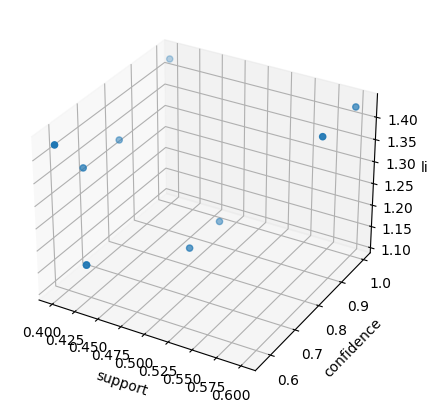

In [166]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules2_sorted['support'],rules2_sorted['confidence'],rules2_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

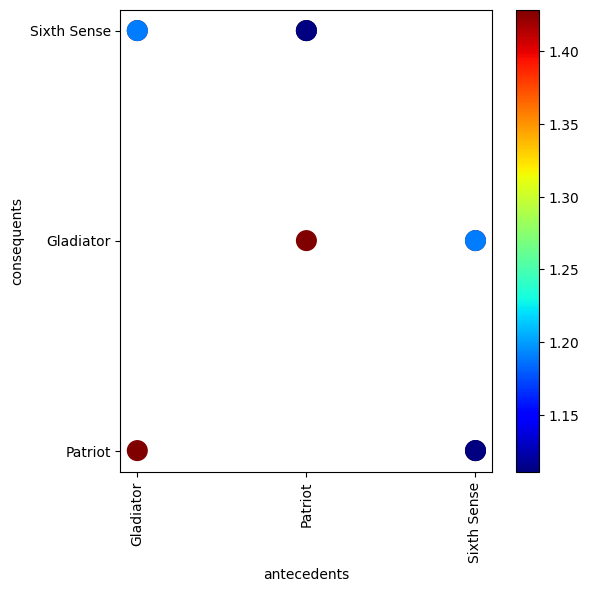

In [167]:
X = rules2_sorted.antecedents
Y = rules2_sorted.consequents
Z = rules2_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

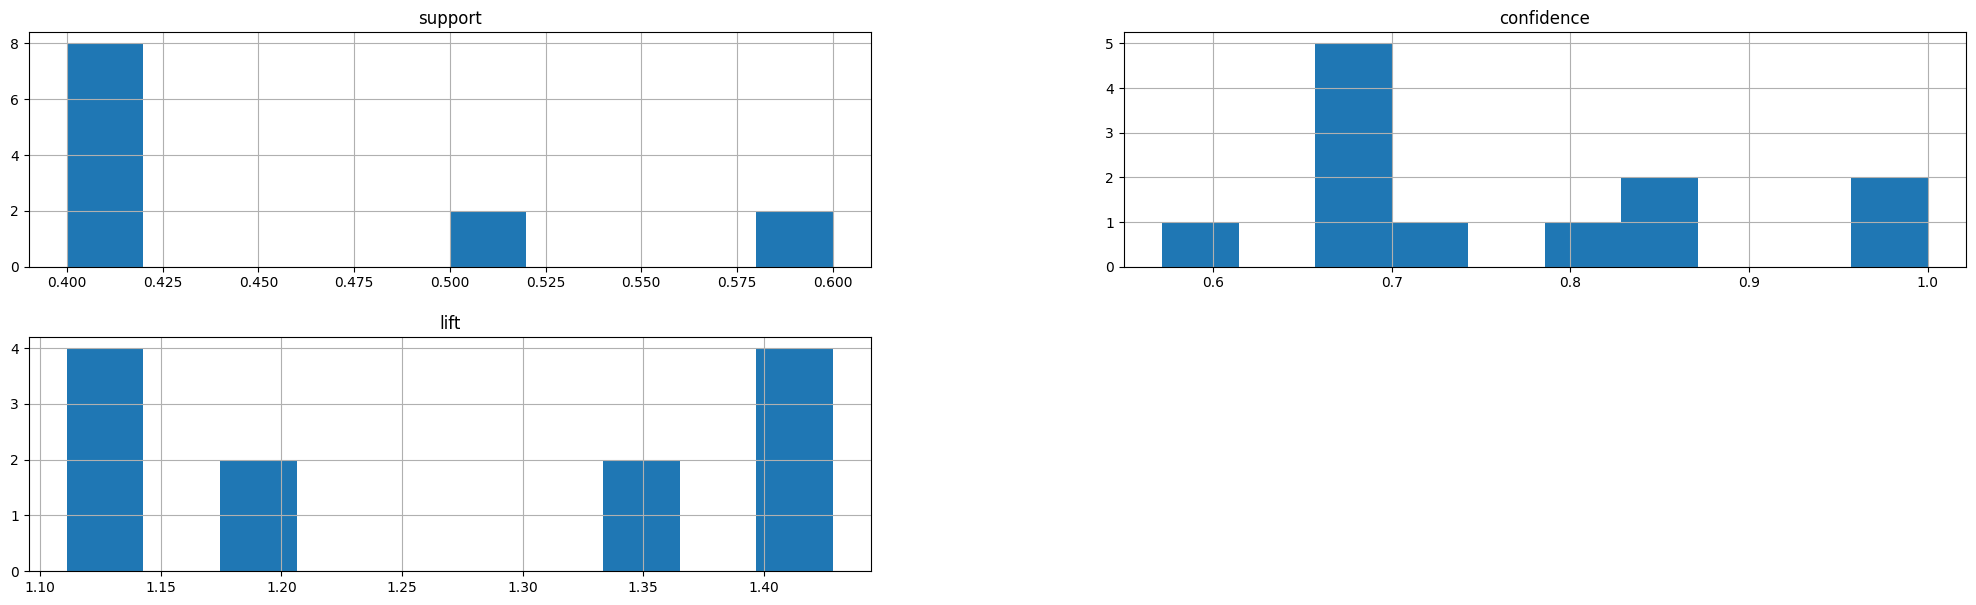

In [168]:
rules2[['support','confidence','lift']].hist(figsize=(25,7))
plt.show()

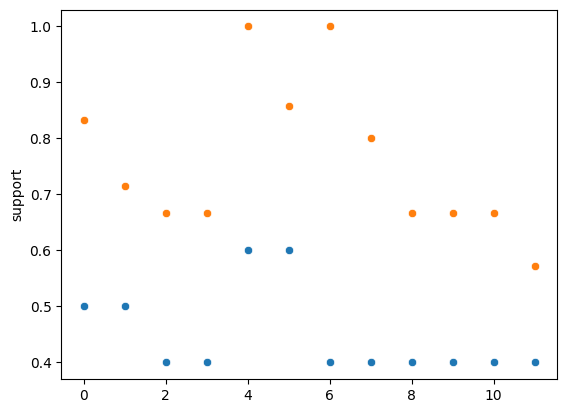

In [169]:
sns.scatterplot(rules2['support'])
sns.scatterplot(rules2['confidence'])
plt.show()

###trail-3
support 40%,confidence 60%

In [170]:
frequent_itemsets3=apriori(movies,min_support=0.40,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Sixth Sense, Patriot, Gladiator)"


In [171]:
rules3=association_rules(frequent_itemsets3,metric="lift",min_threshold=0.6).reset_index()
rules3_sorted=rules3.sort_values('lift',ascending=False)
rules3_sorted

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
11,11,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
7,7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
10,10,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [172]:
rules3_sorted.iloc[0:10]

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
11,11,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
7,7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
10,10,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


Text(0.5, 0, 'lift')

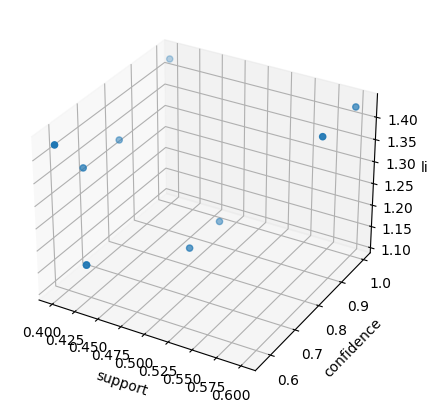

In [173]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules3_sorted['support'],rules3_sorted['confidence'],rules3_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

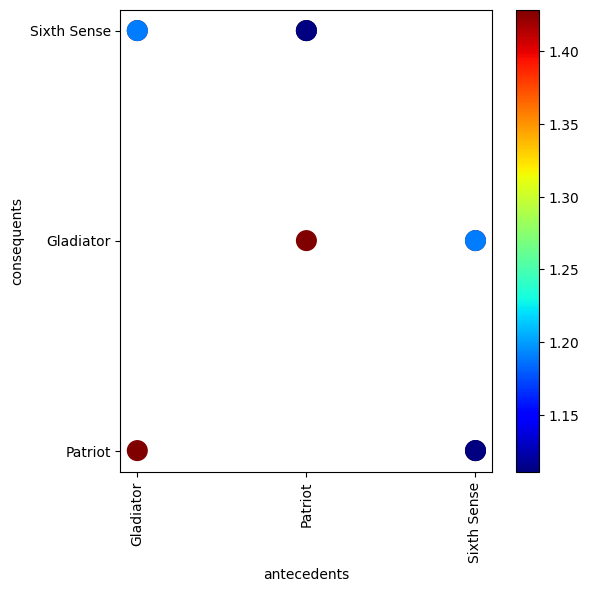

In [174]:
X = rules3_sorted.antecedents
Y = rules3_sorted.consequents
Z = rules3_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

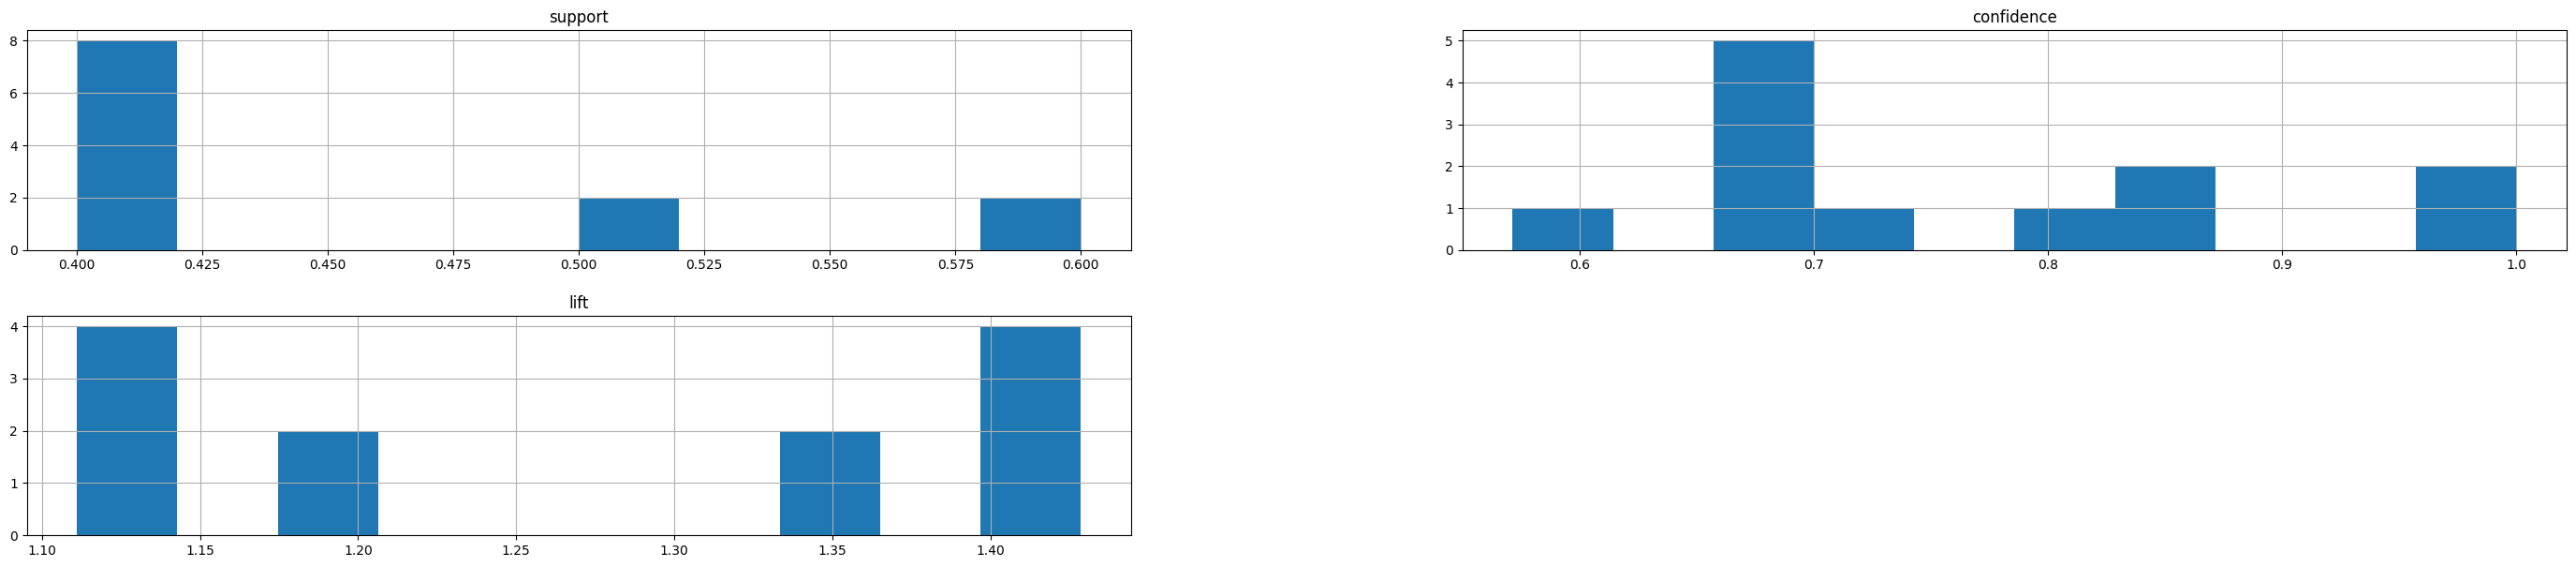

In [175]:
rules3[['support','confidence','lift']].hist(figsize=(35,7))
plt.show()

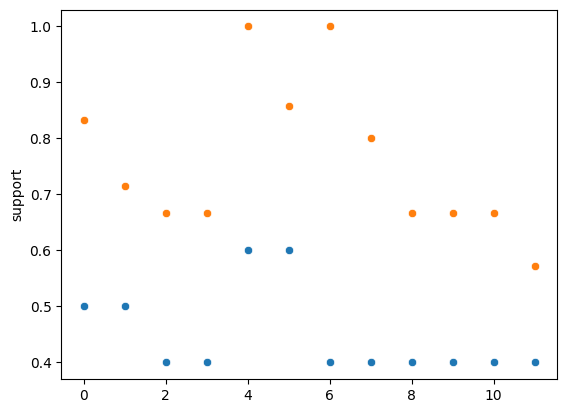

In [176]:
sns.scatterplot(rules3['support'])
sns.scatterplot(rules3['confidence'])
plt.show()

#Conclusion:

In [177]:
def lift_plot(table):
  plt.figure(figsize=(3,3), dpi= 300)
  sns.heatmap(table.pivot('antecedents','consequents','lift'), annot=True)
  plt.title('HeatMap - Antecedents,Consequents and Lift -Matrix',fontsize= 15)
  plt.yticks(rotation=0, fontsize= 5)
  plt.xticks(rotation=40, fontsize= 5)
  plt.show()

 Trail1 support = 20%,confidence=40%


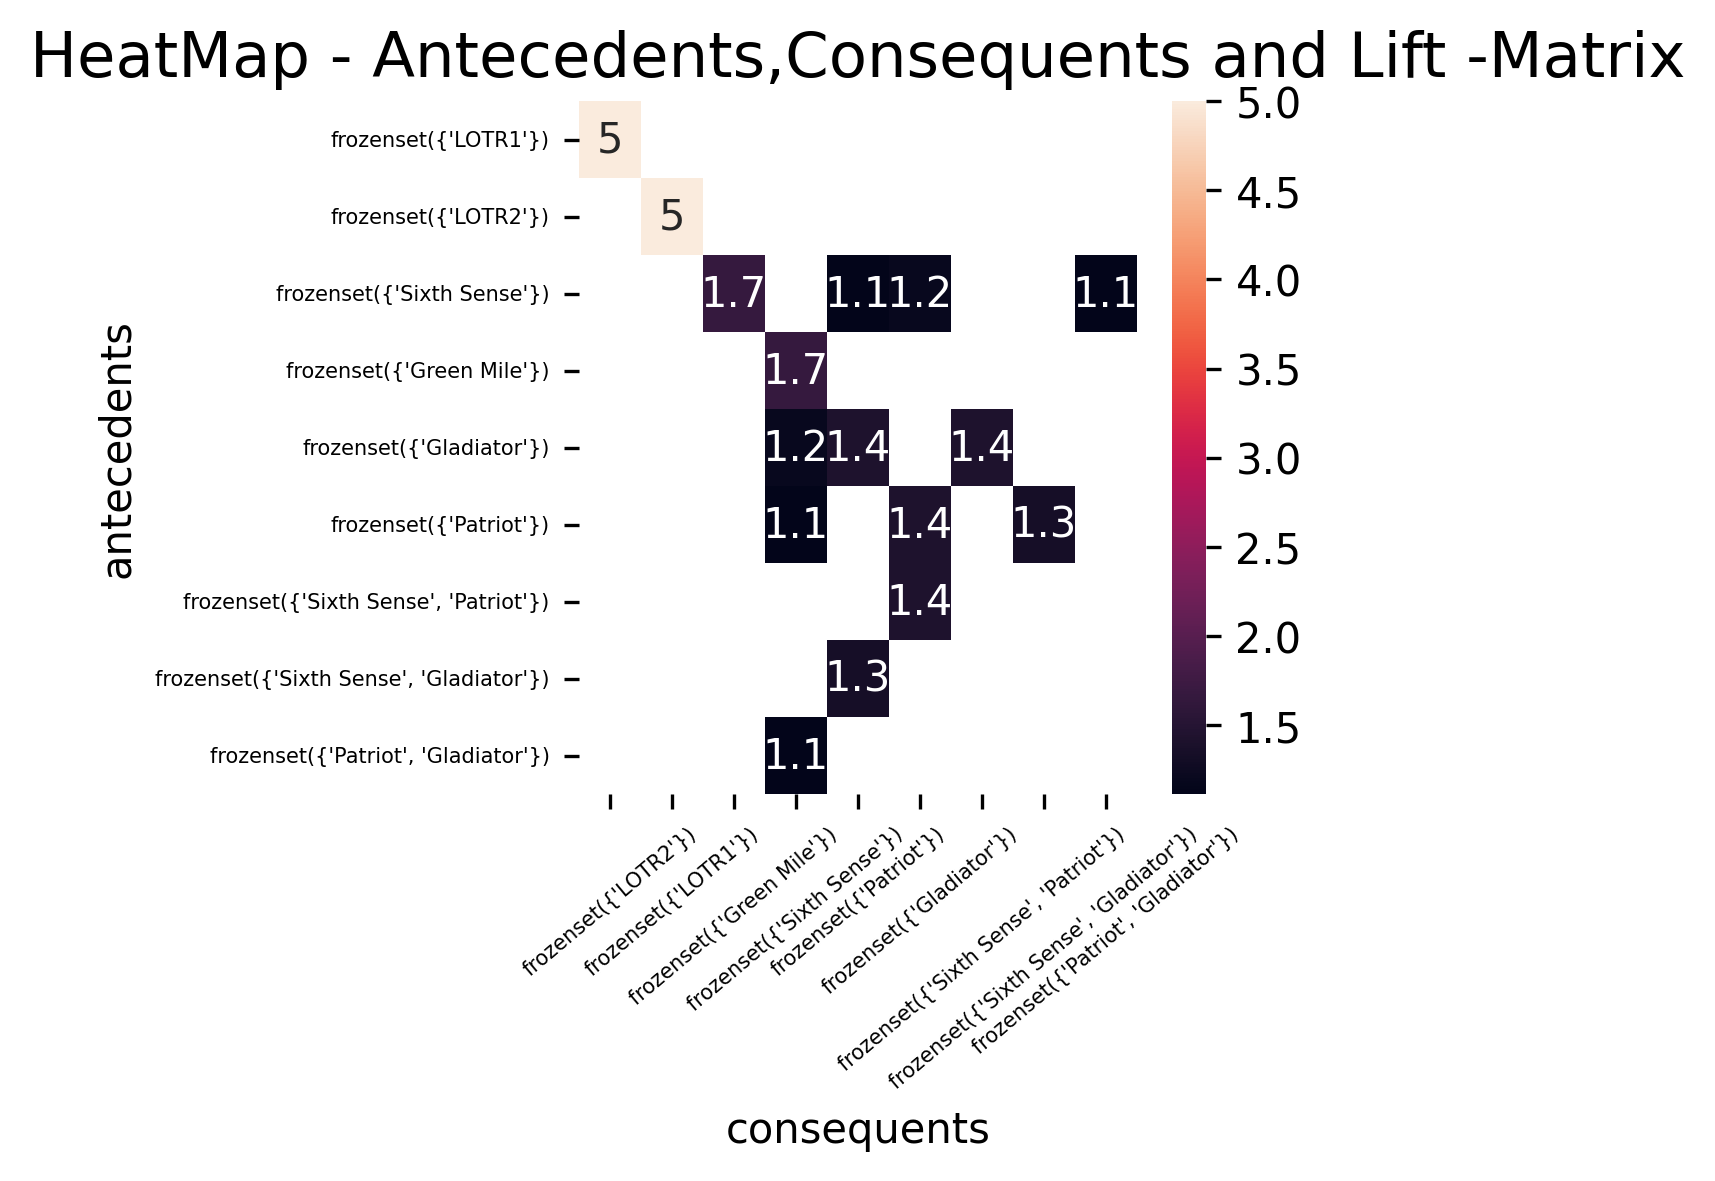


 Trail2 support = 30%,confidence=50%


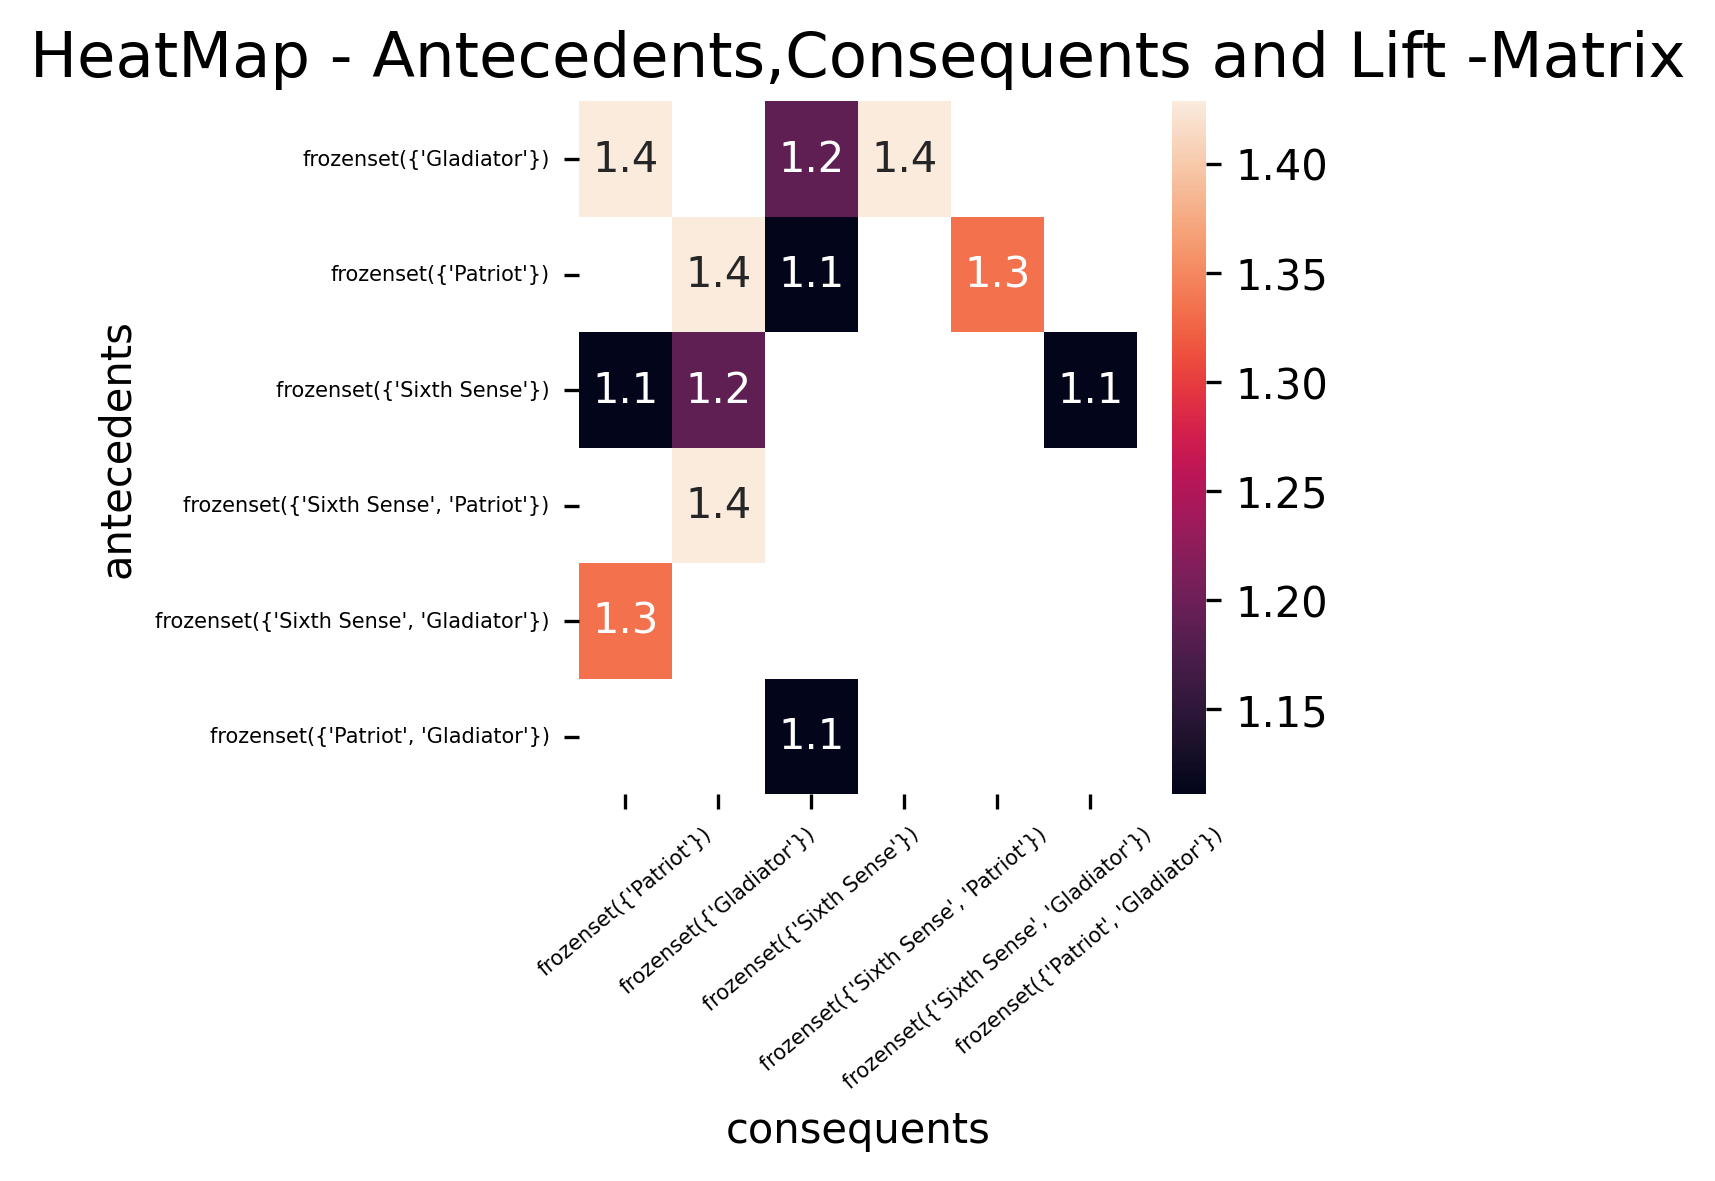


 Trail3 support = 40%,confidence=60%


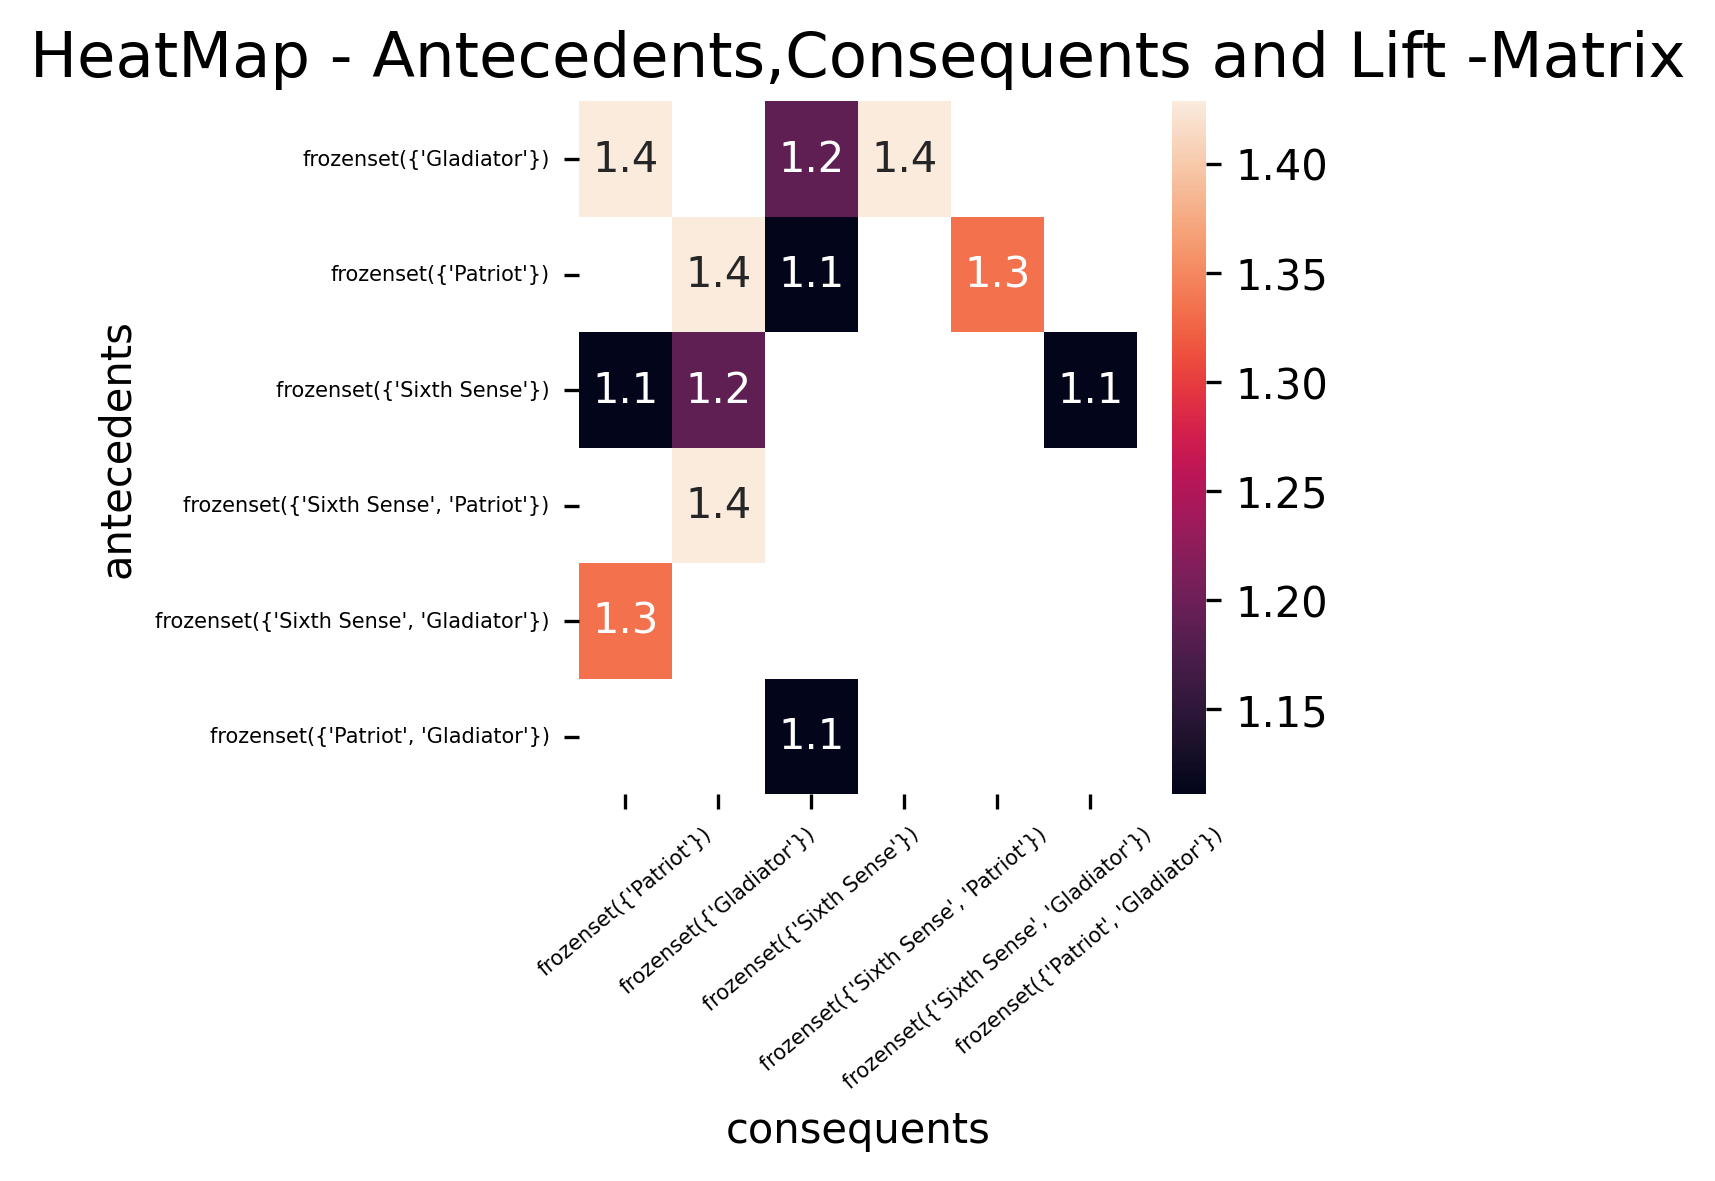

In [178]:
print(' Trail1 support = 20%,confidence=40%')
lift_plot(rules1_sorted)
print('\n Trail2 support = 30%,confidence=50%')
lift_plot(rules2_sorted)
print('\n Trail3 support = 40%,confidence=60%')
lift_plot(rules3_sorted)

*  Trail 1 is giving a good and acceptable association.
*  Trail 2 and Trail 3 are giving almost same association.



---

<center> THANK YOU </center>


---

